In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as  pd
import yfinance as yf
import statsmodels.api as sm
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from scipy.stats import chi2
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA

### Data

In [3]:
# uploading the data from Index2018.csv
df = pd.read_csv('Index2018.csv')
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


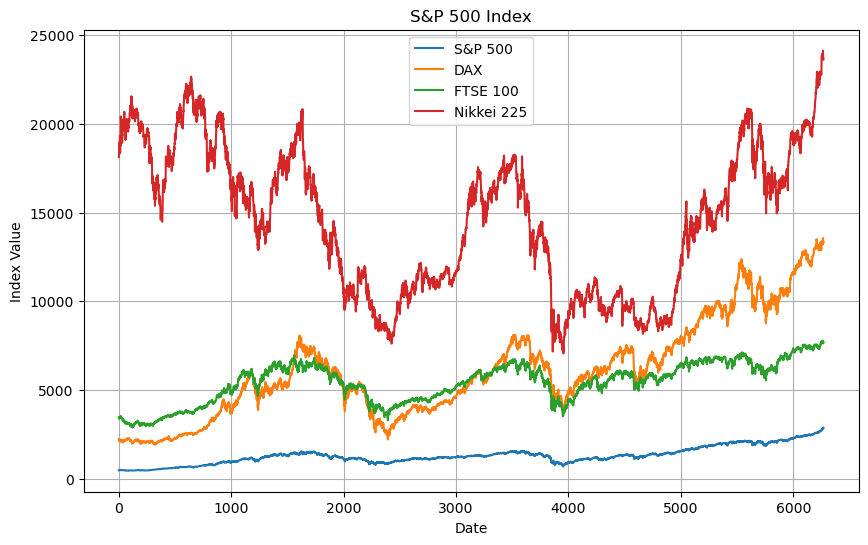

In [4]:
#plot the data
df.spx.plot(figsize=(10, 6))
df.dax.plot(figsize=(10, 6))
df.ftse.plot(figsize=(10, 6))
df.nikkei.plot(figsize=(10, 6))
plt.title('S&P 500 Index')
plt.legend(['S&P 500', 'DAX', 'FTSE 100', 'Nikkei 225'])
plt.grid()
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()


### The QQ Plot

In [5]:
import scipy.stats
import pylab

<function matplotlib.pyplot.show(close=None, block=None)>

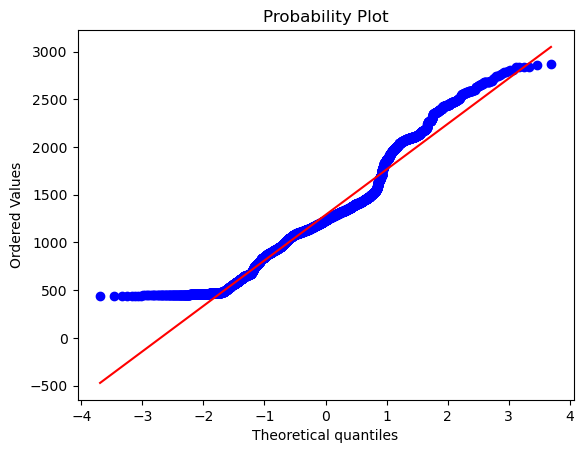

In [6]:
scipy.stats.probplot(df.spx, dist="norm", plot=pylab)
pylab.show

### Length of the time period

In [7]:
df.date.describe()

count           6269
unique          6269
top       29/01/2018
freq               1
Name: date, dtype: object

In [8]:
# convert the date column to datetime format
df.date = pd.to_datetime(df.date, dayfirst=True)

In [9]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [10]:
df.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

### Setting the index

In [11]:
df.set_index('date', inplace=True)

In [12]:
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


### setting the Desired Frequency

In [13]:
df = df.asfreq('b') # setting the Desired Frequency

In [14]:
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


### Handling Missing Values

In [15]:
df.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [16]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [17]:
# fill the missing values with the previous value
df.spx = df.spx.fillna(method='ffill')
df.isna().sum()

C:\Users\Niranjan\AppData\Local\Temp\ipykernel_23772\4148645387.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.spx = df.spx.fillna(method='ffill')


spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [18]:
df.ftse = df.ftse.fillna(method='bfill')
df.isna().sum()

C:\Users\Niranjan\AppData\Local\Temp\ipykernel_23772\2536802754.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.ftse = df.ftse.fillna(method='bfill')


spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [19]:
df.dax = df.dax.fillna(value=df.dax.mean())
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [20]:
df.nikkei = df.nikkei.fillna(method='ffill')
df.isna().sum()

C:\Users\Niranjan\AppData\Local\Temp\ipykernel_23772\1934830004.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.nikkei = df.nikkei.fillna(method='ffill')


spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplifying the Dataset

In [21]:
df['market value'] = df.spx


In [22]:
df.describe()

,spx,dax,ftse,nikkei,market value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.672753,1288.642547
std,487.868210,2752.604984,1145.568370,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [23]:
del df['spx'], df['ftse'], df['dax'], df['nikkei']

In [24]:
df.describe()

,market value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### Splitting the data

In [25]:
# splitting the data using the sklearn library 
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)

In [26]:
df_train.tail()

,market value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [27]:
df_test.head()

,market value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


# White noise

In [28]:
wn = np.random.normal(loc = df.mean(), scale= df.std(), size = len(df))

In [29]:
df['wn'] = wn

In [30]:
df.describe()

,market value,wn
count,6277.000000,6277.000000
mean,1288.642547,1288.463845
std,487.868210,489.549448
min,438.920000,-1034.793452
25%,992.715221,955.143319
50%,1233.761241,1292.695336
75%,1460.250000,1616.701142
max,2872.867839,3203.379879


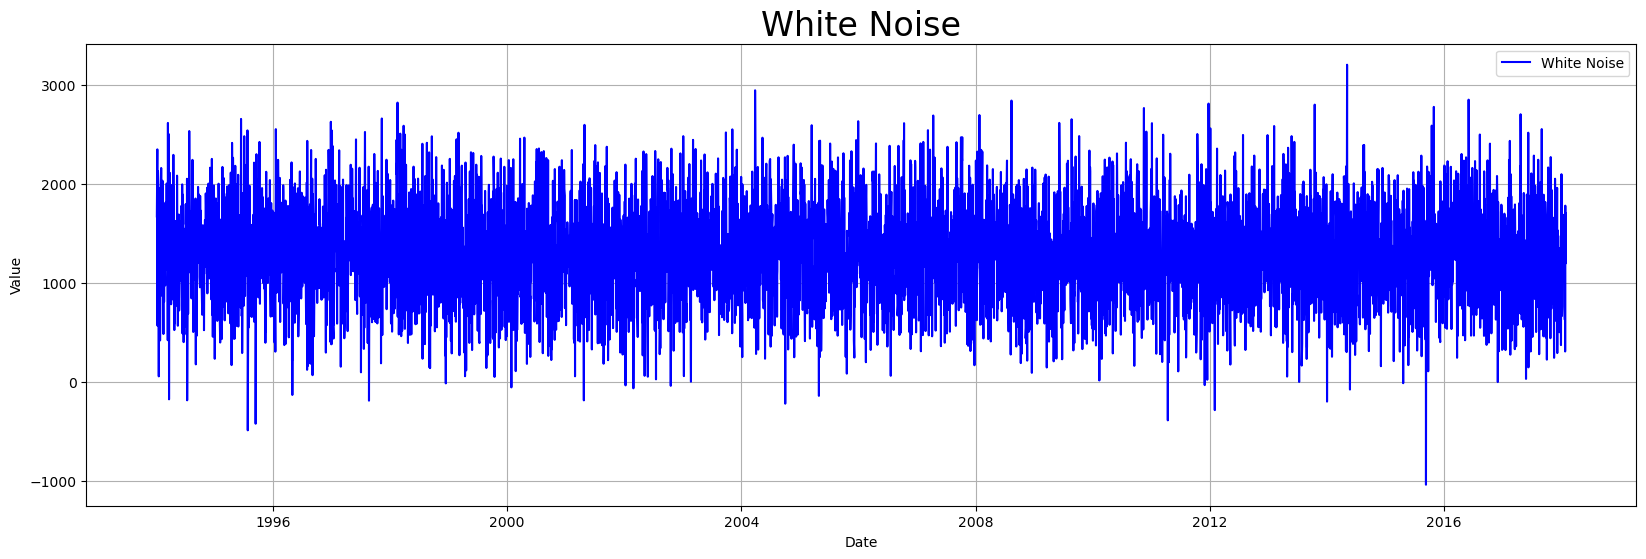

In [31]:
# plot the white noise
plt.figure(figsize=(20, 6))
plt.plot(df.index, df.wn, label='White Noise', color='blue')
plt.title('White Noise', size = 24)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

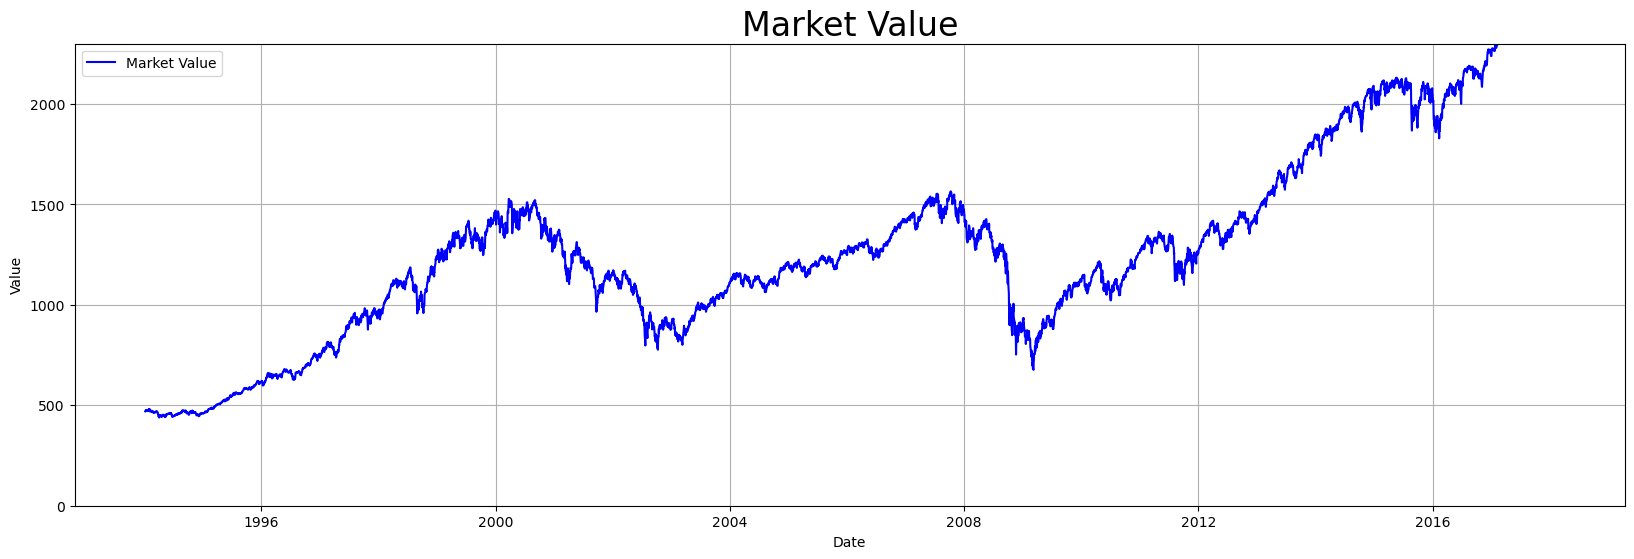

In [32]:
# plot the df.market value
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['market value'], label='Market Value', color='blue')
plt.title('Market Value', size = 24)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.ylim(0,2300)
plt.grid()
plt.show()

# Random Walk

In [33]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')  # setting the Desired Frequency

In [34]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [35]:
df['rw'] = rw.price

In [36]:
df.head()

,market value,wn,rw
date,,,
1994-01-07,469.90,1672.978614,1122.139662
1994-01-10,475.27,2349.332740,1080.347860
1994-01-11,474.13,570.127809,1082.095245
1994-01-12,474.17,1764.136071,1083.639265
1994-01-13,472.47,685.548761,1067.146255


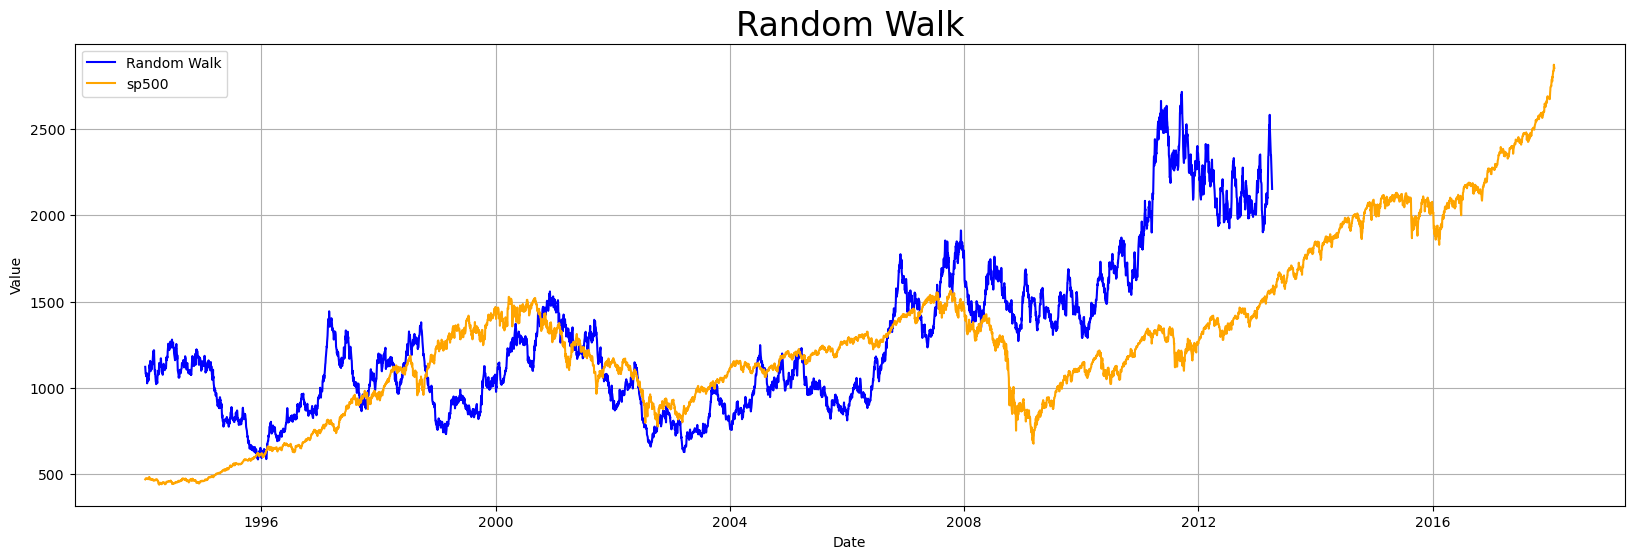

In [37]:
# plot the random walk
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['rw'], label='Random Walk', color='blue')
plt.plot(df.index, df['market value'], label='sp500', color='orange')
plt.title('Random Walk', size = 24)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# ADF test

In [38]:
# change market value column name to market_value
df.rename(columns={'market value': 'market_value'}, inplace=True)

In [39]:
sts.adfuller(df.market_value)

(np.float64(1.1194986381728411),
 np.float64(0.9953796476080692),
 10,
 6266,
 {'1%': np.float64(-3.4313940441948807),
  '5%': np.float64(-2.8620013751563964),
  '10%': np.float64(-2.567015587023998)},
 np.float64(50258.209867750025))

In [40]:
sts.adfuller(df.wn)

(np.float64(-77.30864281888066),
 0.0,
 0,
 6276,
 {'1%': np.float64(-3.4313923799633836),
  '5%': np.float64(-2.862000639842268),
  '10%': np.float64(-2.567015195598801)},
 np.float64(95018.4891110718))

# Seasonality

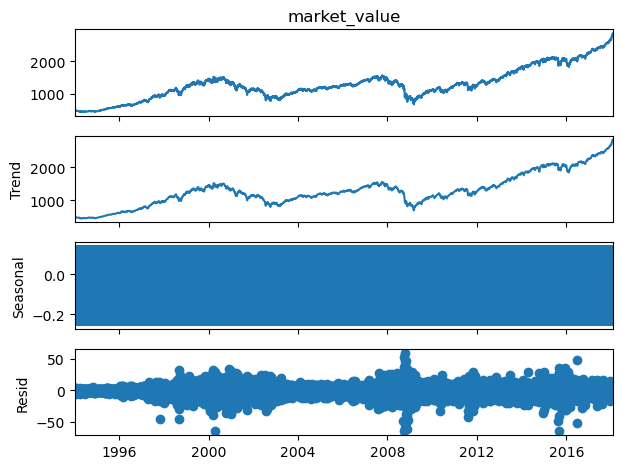

In [41]:
s_dec = seasonal_decompose(df.market_value, model='additive')
s_dec.plot()
plt.show()

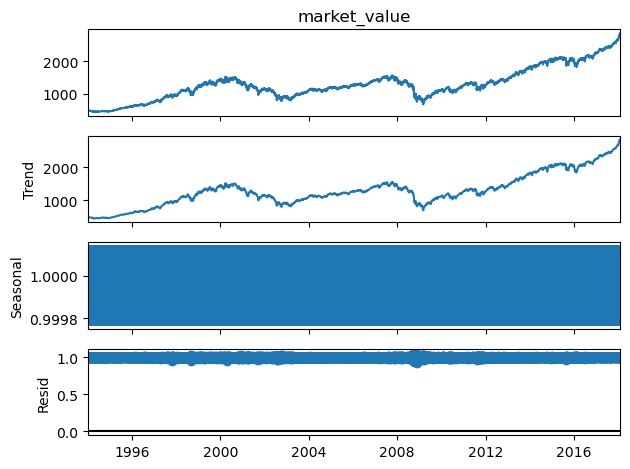

In [42]:
s_dec_mult = seasonal_decompose(df.market_value, model='multiplicative')
s_dec_mult.plot()       
plt.show()

# ACF

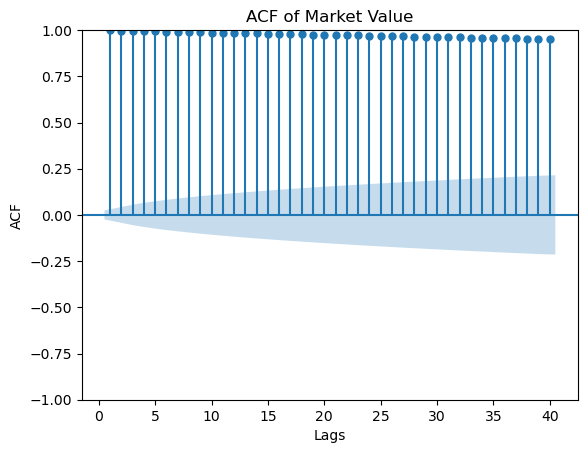

In [43]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title('ACF of Market Value')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

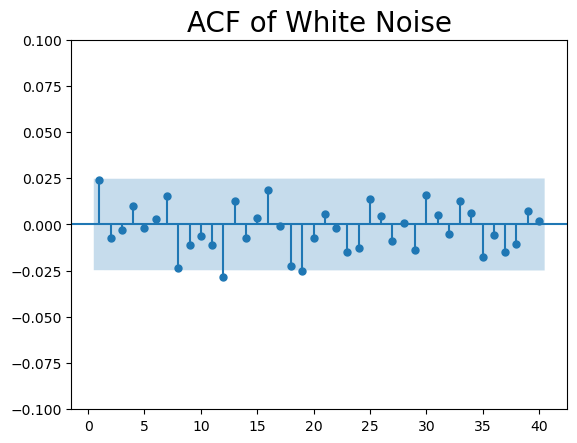

In [44]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('ACF of White Noise', size=20)
plt.show()

# PACF

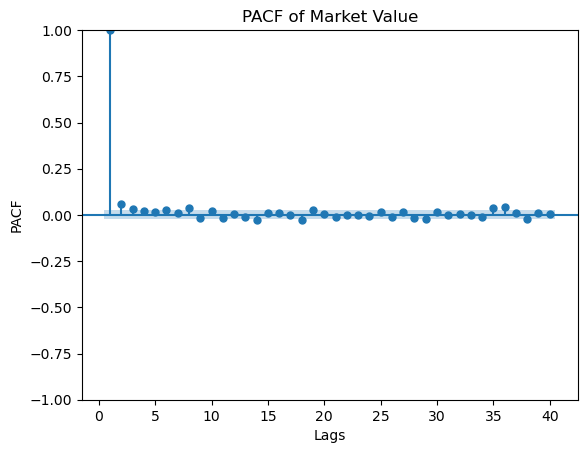

In [45]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method=('ols'))
plt.title('PACF of Market Value')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

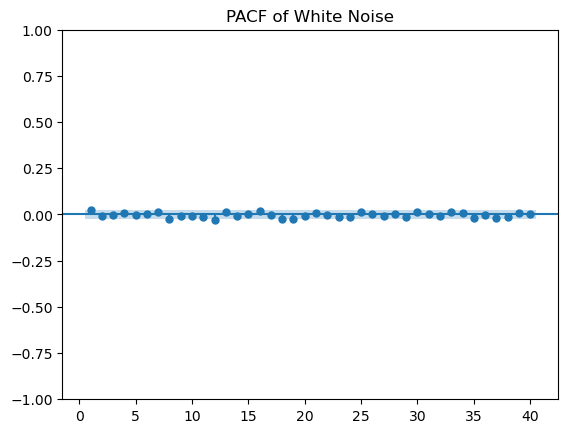

In [46]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols'))
plt.title('PACF of White Noise')
plt.show()

# Auto Regressive (AR) model

In [47]:
model_ar = ARIMA(df.market_value, order=(1,0,0))
results_ar = model_ar.fit()

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [48]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -25274.921
Date:                Mon, 04 Aug 2025   AIC                          50555.842
Time:                        20:03:25   BIC                          50576.076
Sample:                    01-07-1994   HQIC                         50562.853
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.7920    571.791      2.254      0.024     168.102    2409.483
ar.L1          0.9998      0.000   2594.918      0.000       0.999       1.001
sigma2       183.8184      1.747    105.217      0.000     180.394     187.243
===================================================================================
Ljung-Box (L1) (Q):                  20.16   Jarque-Bera (JB):              7028.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher Lag AR Models

In [49]:
model_ar2 = ARIMA(df.market_value, order=(2,0,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -25264.990
Date:                Mon, 04 Aug 2025   AIC                          50537.980
Time:                        20:03:30   BIC                          50564.958
Sample:                    01-07-1994   HQIC                         50547.327
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6754    688.074      1.873      0.061     -59.925    2637.275
ar.L1          0.9439      0.008    114.869      0.000       0.928       0.960
ar.L2          0.0560      0.008      6.808      0.000       0.040       0.072
sigma2       183.2373      1.738    105.406      0.000     179.830     186.644
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              7143.86
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
model_ar3 = ARIMA(df.market_value, order=(3,0,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -25261.700
Date:                Mon, 04 Aug 2025   AIC                          50533.400
Time:                        20:03:35   BIC                          50567.123
Sample:                    01-07-1994   HQIC                         50545.085
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6592   1784.541      0.722      0.470   -2208.977    4786.295
ar.L1          0.9421      0.008    114.297      0.000       0.926       0.958
ar.L2          0.0259      0.011      2.402      0.016       0.005       0.047
ar.L3          0.0319      0.007      4.445      0.000       0.018       0.046
sigma2       183.0366      1.753    104.410      0.000     179.601     186.473
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7017.60
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
model_ar4 = ARIMA(df.market_value, order=(4,0,0))
results_ar4 = model_ar4.fit()
results_ar4.summary()

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -25260.641
Date:                Mon, 04 Aug 2025   AIC                          50533.282
Time:                        20:03:43   BIC                          50573.750
Sample:                    01-07-1994   HQIC                         50547.303
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6752   1712.998      0.752      0.452   -2068.740    4646.091
ar.L1          0.9415      0.008    114.281      0.000       0.925       0.958
ar.L2          0.0255      0.011      2.361      0.018       0.004       0.047
ar.L3          0.0146      0.011      1.323      0.186      -0.007       0.036
ar.L4          0.0184      0.008      2.200      0.028       0.002       0.035
sigma2       182.9436      1.754    104.313      0.000     179.506     186.381
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7010.39
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model_ar5 = ARIMA(df.market_value, order=(5,0,0))
results_ar5 = model_ar5.fit()
model_ar6 = ARIMA(df.market_value, order=(6,0,0))
results_ar6 = model_ar6.fit()

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

## LLR Test

"""
🔍 Log-Likelihood Ratio (LLR) Test — Explained

The LLR test is used to compare two **nested time series models**, such as MA(1) vs MA(2),
or AR(1) vs AR(2), to determine if the more complex model offers a statistically significant improvement.

We compute:
    LLR = 2 × (log-likelihood of full model − log-likelihood of restricted model)

This test statistic follows a **chi-squared distribution** with degrees of freedom equal to
the number of additional parameters in the full model.

✅ Use Cases:
- Comparing MA(q) models with increasing q
- Comparing AR(p) models with increasing p
- Testing if adding extra lags improves model fit

✅ Interpretation:
- If p-value < 0.05: The more complex model is **significantly better** → prefer the full model.
- If p-value ≥ 0.05: Extra parameters do **not** improve the model significantly → prefer the simpler model.

This is a powerful tool for model order selection in time series analysis.
"""


In [53]:
def llr_test(model1, model2, DF=1):
    L1 = model1.fit().llf
    L2 = model2.fit().llf
    LR = 2 * (L2 - L1)
    p = chi2.sf(LR, DF).round(4)
    return p


In [54]:
llr_test(model_ar, model_ar2)

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


np.float64(0.0)

In [55]:
llr_test(model_ar2, model_ar3)

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


np.float64(0.0103)

In [56]:

llr_test(model_ar3, model_ar4)

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


np.float64(0.1456)

In [57]:
llr_test(model_ar4, model_ar5)

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

np.float64(0.3885)

In [58]:
llr_test(model_ar5, model_ar6)

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

np.float64(1.0)

In [59]:
print('LLR test: '+ str(llr_test(model_ar, model_ar3, DF=2)))

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


LLR test: 0.0


## Using returns instead of  prices

## The ADF test

In [60]:
sts.adfuller(df.market_value)

(np.float64(1.1194986381728411),
 np.float64(0.9953796476080692),
 10,
 6266,
 {'1%': np.float64(-3.4313940441948807),
  '5%': np.float64(-2.8620013751563964),
  '10%': np.float64(-2.567015587023998)},
 np.float64(50258.209867750025))

The market value contains prices which are not stationary that's why we fail to reject the null hypothesis

## Using returns

In [61]:
df['returns'] = df.market_value.pct_change().mul(100)  

In [62]:
df.dropna(inplace=True)

In [63]:
sts.adfuller(df.returns)

(np.float64(-17.034457190981154),
 np.float64(8.28053702031718e-30),
 17,
 5002,
 {'1%': np.float64(-3.431658008603046),
  '5%': np.float64(-2.862117998412982),
  '10%': np.float64(-2.567077669247375)},
 np.float64(16035.926219345134))

## ACF and PACF for returns

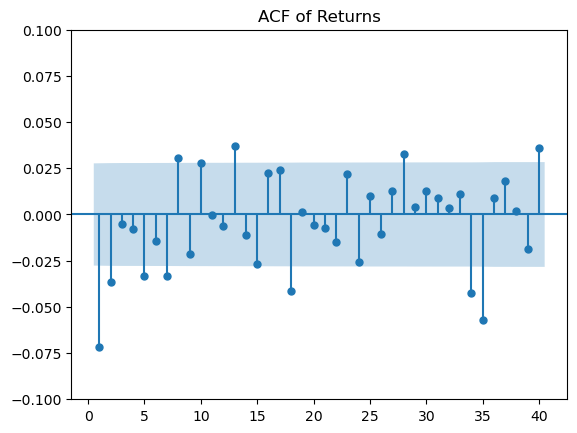

In [64]:
sgt.plot_acf(df.returns, lags=40, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('ACF of Returns')
plt.show()

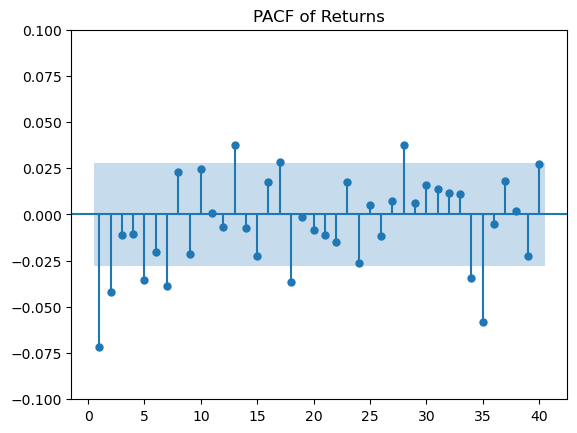

In [65]:
sgt.plot_pacf(df.returns, lags=40, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('PACF of Returns')
plt.show()

## AR(1) for returns

In [66]:
model_ret_ar_1 = ARIMA(df.returns, order=(1,0,0))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -8067.541
Date:                Mon, 04 Aug 2025   AIC                          16141.081
Time:                        20:05:24   BIC                          16160.645
Sample:                    01-10-1994   HQIC                         16147.937
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.915      0.055      -0.001       0.063
ar.L1         -0.0719      0.008     -8.514      0.000      -0.088      -0.055
sigma2         1.4568      0.013    114.005      0.000       1.432       1.482
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             14951.82
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher lag AR models for returns

In [67]:
model_ret_ar_2 = ARIMA(df.returns, order=(2,0,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -8063.177
Date:                Mon, 04 Aug 2025   AIC                          16134.354
Time:                        20:05:24   BIC                          16160.439
Sample:                    01-10-1994   HQIC                         16143.494
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.963      0.050    5.43e-05       0.062
ar.L1         -0.0749      0.009     -8.788      0.000      -0.092      -0.058
ar.L2         -0.0417      0.007     -6.035      0.000      -0.055      -0.028
sigma2         1.4543      0.013    108.088      0.000       1.428       1.481
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13914.49
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
llr_test(model_ret_ar_1, model_ret_ar_2)

np.float64(0.0031)

In [69]:
model_ret_ar_3 = ARIMA(df.returns, order=(3,0,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -8062.879
Date:                Mon, 04 Aug 2025   AIC                          16135.758
Time:                        20:05:26   BIC                          16168.364
Sample:                    01-10-1994   HQIC                         16147.184
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.971      0.049       0.000       0.062
ar.L1         -0.0753      0.009     -8.850      0.000      -0.092      -0.059
ar.L2         -0.0425      0.007     -6.159      0.000      -0.056      -0.029
ar.L3         -0.0109      0.008     -1.318      0.188      -0.027       0.005
sigma2         1.4541      0.013    108.106      0.000       1.428       1.481
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13902.15
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
llr_test(model_ret_ar_2, model_ret_ar_3)

np.float64(0.4403)

since adding lag 3 makes our model insignificant, we will only use AR(2)

## Normalizing values

As we know prices data are not stationary, so normalizing doesn't make it any better.
Also normalizing the returns doesn't improve the model as it is stationary both the way.

## Residual

In [71]:
df['res_ret'] = results_ret_ar_2.resid

In [72]:
df.res_ret.mean()

np.float64(2.0323390211146884e-05)

In [73]:
df.res_ret.var()

1.4546171200548632

In [74]:
sts.adfuller(df.res_ret)

(np.float64(-16.961420305258322),
 np.float64(9.302280007300861e-30),
 17,
 5002,
 {'1%': np.float64(-3.431658008603046),
  '5%': np.float64(-2.862117998412982),
  '10%': np.float64(-2.567077669247375)},
 np.float64(16035.800317293031))

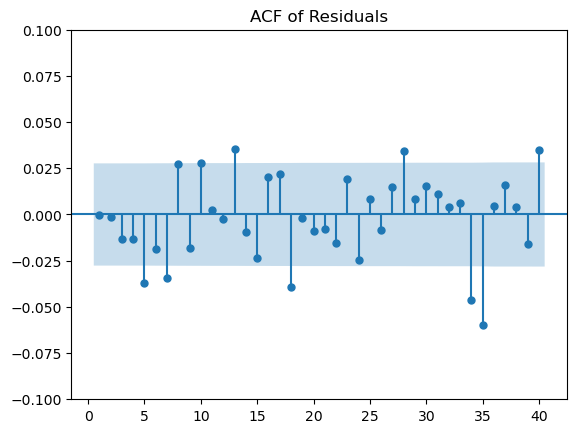

In [75]:
sgt.plot_acf(df.res_ret, lags=40, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('ACF of Residuals')
plt.show()

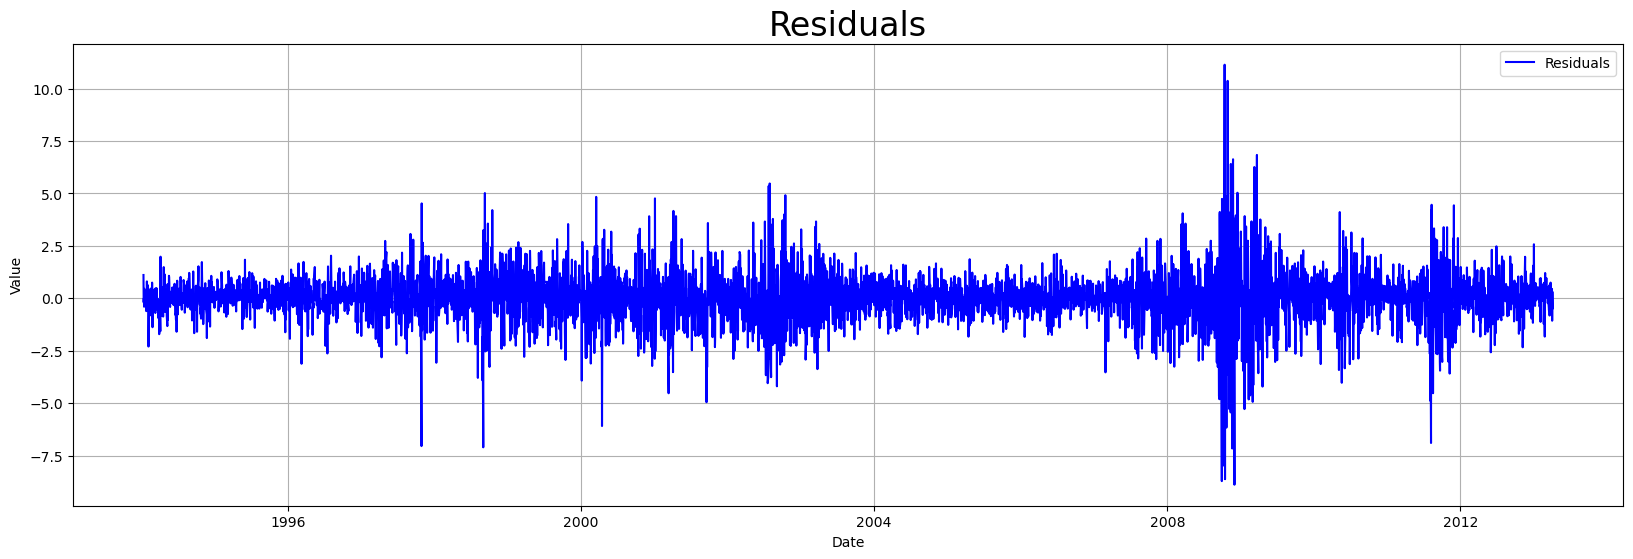

In [76]:
# plot the residuals
plt.figure(figsize=(20, 6))
plt.plot(df.index, df.res_ret, label='Residuals', color='blue')
plt.title('Residuals', size = 24)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Moving Average (MA model)

In [77]:
df = pd.read_csv("Index2018.csv")
df.date = pd.to_datetime(df.date, dayfirst=True)
df.set_index('date', inplace=True)
df = df.asfreq('b')  # setting the Desired Frequency
df= df.fillna(method='ffill')  # fill missing values with forward fill

C:\Users\Niranjan\AppData\Local\Temp\ipykernel_23772\3319334016.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill')  # fill missing values with forward fill


In [78]:
df['market_value'] = df.ftse

In [79]:
# Delete columns dax, ftse, nikkei and rename spx to market_value
df.drop(['dax', 'ftse', 'nikkei', 'spx'], axis=1, inplace=True)

size = int(len(df) * 0.8)
df, df_test = df[:size], df[size:]


### Creating returns

In [80]:
df['returns'] = df.market_value.pct_change(1)*100

In [81]:
# Remove NaN values from the DataFrame
df.dropna(inplace=True)
df

,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842
...,...,...
2013-04-01,6411.74,0.000000
2013-04-02,6490.66,1.230867
2013-04-03,6420.28,-1.084327


###  ACF for Returns

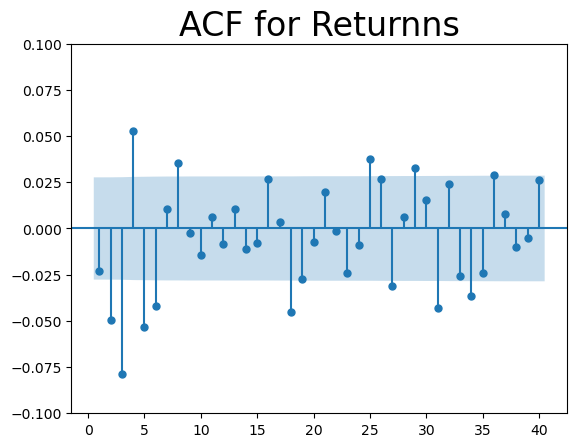

In [82]:
sgt.plot_acf(df.returns, zero=False, lags=40)
plt.title('ACF for Returnns', size=24)
# Set the y-axis limits
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.show()

### MA(1) for Returns

In [83]:
model_ret_ma_1 = ARIMA(df.returns, order=(0, 0, 1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Mon, 04 Aug 2025   AIC                          15865.190
Time:                        20:05:29   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7852.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### higher lag MA models

In [84]:
model_ret_ma_2 = ARIMA(df.returns, order=(0, 0, 2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print('LLR test: '+ str(llr_test(model_ret_ma_1, model_ret_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7922.864
Date:                Mon, 04 Aug 2025   AIC                          15853.728
Time:                        20:05:30   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.204      0.228      -0.012       0.049
ma.L1         -0.0327      0.009     -3.760      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.416      0.0

In [85]:
model_ret_ma_3 = ARIMA(df.returns, order=(0, 0, 3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print('LLR test: '+ str(llr_test(model_ret_ma_2, model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7904.317
Date:                Mon, 04 Aug 2025   AIC                          15818.634
Time:                        20:05:32   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.296      0.195      -0.010       0.048
ma.L1         -0.0203      0.009     -2.334      0.020      -0.037      -0.003
ma.L2         -0.0556      0.008     -7.032      0.0

In [86]:
model_ret_ma_4 = ARIMA(df.returns, order=(0, 0, 4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print('LLR test: '+ str(llr_test(model_ret_ma_3, model_ret_ma_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7898.773
Date:                Mon, 04 Aug 2025   AIC                          15809.547
Time:                        20:05:35   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.236      0.217      -0.011       0.049
ma.L1         -0.0203      0.009     -2.239      0.025      -0.038      -0.003
ma.L2         -0.0551      0.008     -6.835      0.0

In [87]:
model_ret_ma_5 = ARIMA(df.returns, order=(0, 0, 5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print('LLR test: '+ str(llr_test(model_ret_ma_4, model_ret_ma_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7892.823
Date:                Mon, 04 Aug 2025   AIC                          15799.645
Time:                        20:05:38   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.282      0.200      -0.010       0.048
ma.L1         -0.0262      0.009     -2.839      0.005      -0.044      -0.008
ma.L2         -0.0497      0.008     -6.147      0.0

In [88]:
model_ret_ma_6 = ARIMA(df.returns, order=(0, 0, 6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print('LLR test: '+ str(llr_test(model_ret_ma_5, model_ret_ma_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7889.221
Date:                Mon, 04 Aug 2025   AIC                          15794.442
Time:                        20:05:42   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.318      0.188      -0.009       0.047
ma.L1         -0.0237      0.009     -2.562      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.0

In [89]:
model_ret_ma_7 = ARIMA(df.returns, order=(0, 0, 7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print('LLR test: '+ str(llr_test(model_ret_ma_6, model_ret_ma_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7889.046
Date:                Mon, 04 Aug 2025   AIC                          15796.091
Time:                        20:05:46   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.303      0.193      -0.010       0.047
ma.L1         -0.0247      0.009     -2.645      0.008      -0.043      -0.006
ma.L2         -0.0488      0.008     -6.000      0.0

In [90]:
model_ret_ma_8 = ARIMA(df.returns, order=(0, 0, 8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print('LLR test: '+ str(llr_test(model_ret_ma_7, model_ret_ma_8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Mon, 04 Aug 2025   AIC                          15791.205
Time:                        20:05:52   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

Using lag 7, we can conclude that the model performs better only using the 6 lags. Because the LLR value for lag 7 makes it insignificant. But instead of stopping there, moving to the lag 8 mkaes the model still significant. Therefore, its important to consider many lags before everything becomes insignificant.

In [91]:
llr_test(model_ret_ma_6, model_ret_ma_8, DF=2)

np.float64(0.0268)

this suggest higher lag model fits better

### Residuals of returns (MA(8) model)

In [92]:
df['res_ret_ma_8'] = results_ret_ma_8.resid

In [93]:
# print the mean and variance of the residuals
print('Mean of residuals: ', round(df.res_ret_ma_8.mean(),4))
print('Variance of residuals: ', round(df.res_ret_ma_8.var(),3))

Mean of residuals:  -0.0001
Variance of residuals:  1.355


In [94]:
# standard deviation of the residuals
print('Standard deviation of residuals: ', round(df.res_ret_ma_8.std(),3))

Standard deviation of residuals:  1.164


1.164*3 = 3.492 so that means we could be off by 3.492% in our predictions in either direction

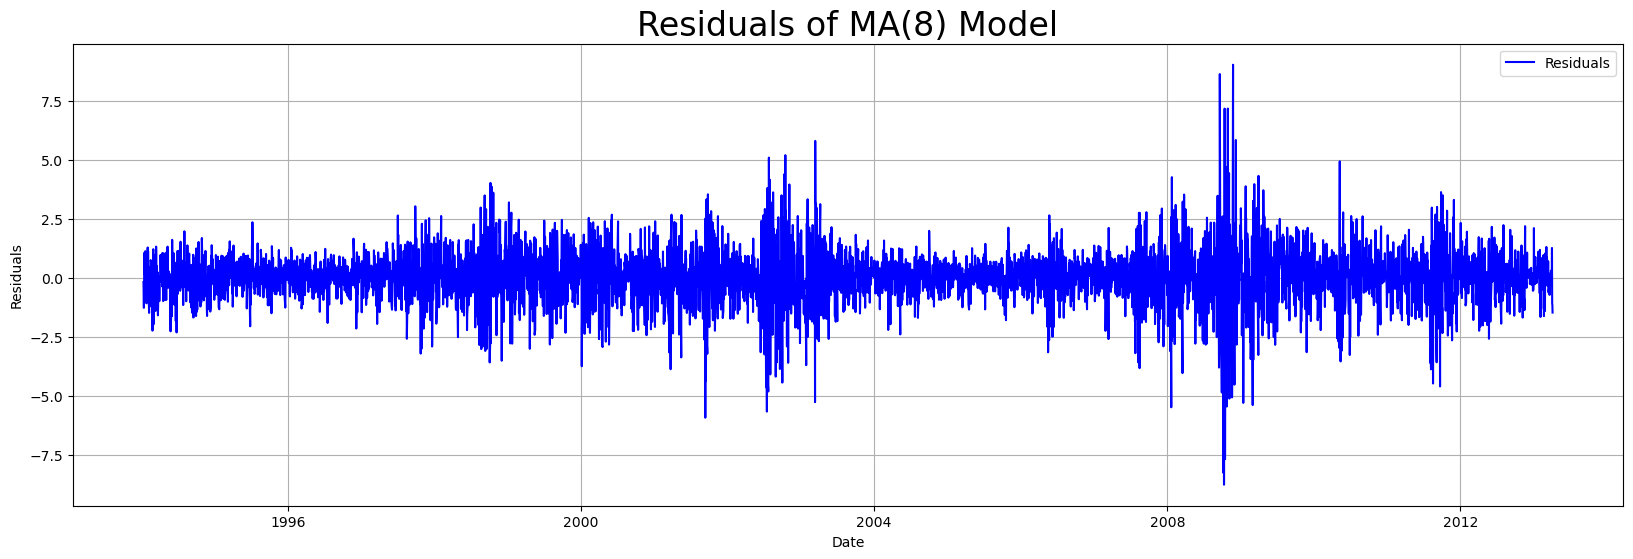

In [95]:
# plot the residuals with year as x-axis
plt.figure(figsize=(20, 6))
plt.plot(df.res_ret_ma_8, label='Residuals', color='blue')
plt.title('Residuals of MA(8) Model', size = 24)    
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

In [96]:
sts.adfuller(df.res_ret_ma_8)   

(np.float64(-70.83777222233495),
 0.0,
 0,
 5019,
 {'1%': np.float64(-3.4316535759402753),
  '5%': np.float64(-2.8621160400844468),
  '10%': np.float64(-2.567076626752987)},
 np.float64(15689.881935682502))

so the residuals are stationary. Because the p value is less that 5%, we are rejecting the null.

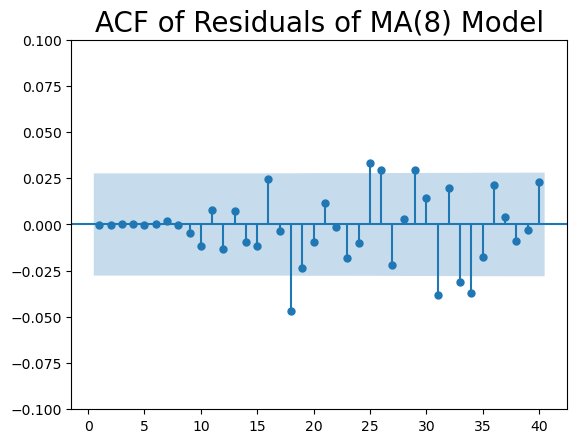

In [97]:
sgt.plot_acf(df.res_ret_ma_8, lags=40, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('ACF of Residuals of MA(8) Model', size=20)
plt.show()

After fitting the MA(8) model with the two lags, the 8 lags were already explained by the model thats why when we check the ACF plot for the residuals, it is close to zero.

### Residuals of Returns(MA(6) model)

In [98]:
df['res_ret_ma_6'] = results_ret_ma_6.resid

In [99]:
# mean, variance and standard deviation of the residuals
print('Mean of residuals: ', round(df.res_ret_ma_6.mean(),4))
print('Variance of residuals: ', round(df.res_ret_ma_6.var(),3))
print('Standard deviation of residuals: ', round(df.res_ret_ma_6.std(),3))

Mean of residuals:  -0.0
Variance of residuals:  1.357
Standard deviation of residuals:  1.165


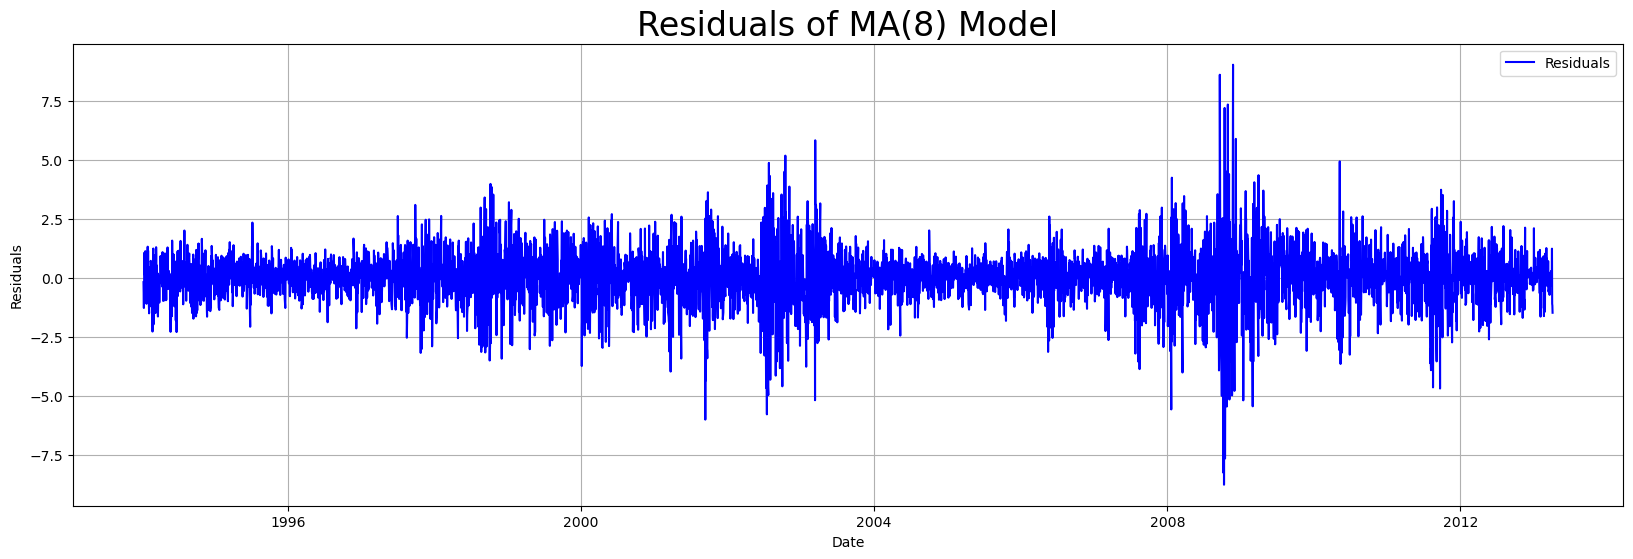

In [100]:
# plot the residuals with year as x-axis
plt.figure(figsize=(20, 6))
plt.plot(df.res_ret_ma_6, label='Residuals', color='blue')
plt.title('Residuals of MA(8) Model', size = 24)    
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

In [101]:
sts.adfuller(df.res_ret_ma_6)   

(np.float64(-70.84148865364281),
 0.0,
 0,
 5019,
 {'1%': np.float64(-3.4316535759402753),
  '5%': np.float64(-2.8621160400844468),
  '10%': np.float64(-2.567076626752987)},
 np.float64(15697.059691587048))

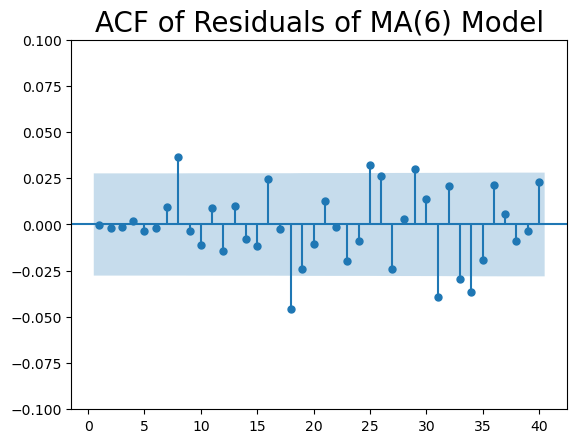

In [102]:
# plot acf of lag 6 residuals
sgt.plot_acf(df.res_ret_ma_6, lags=40, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis  
plt.title('ACF of Residuals of MA(6) Model', size=20)
plt.show()

### Normalized Returns

In [103]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

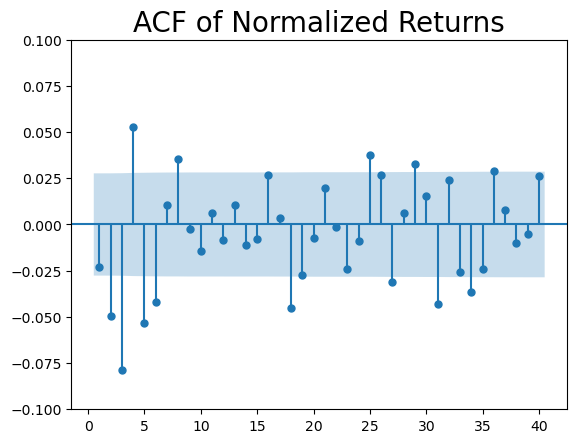

In [104]:
#acf for normalized returns
sgt.plot_acf(df.norm_ret, lags=40, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('ACF of Normalized Returns', size=20)
plt.show()

In [105]:
# fitting an ARMA model to the normalized returns for MA(8) model
model_norm_ret_ma_8 = ARIMA(df.norm_ret, order=(0, 0, 8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
print(results_norm_ret_ma_8.summary())


                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -32255.814
Date:                Mon, 04 Aug 2025   AIC                          64531.627
Time:                        20:06:01   BIC                          64596.839
Sample:                    01-10-1994   HQIC                         64554.478
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4078      1.942     -1.240      0.215      -6.215       1.399
ma.L1         -0.0238      0.009     -2.518      0.012      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.030      0.0

In [106]:
df['res_norm_ret_ma_8'] = results_norm_ret_ma_8.resid

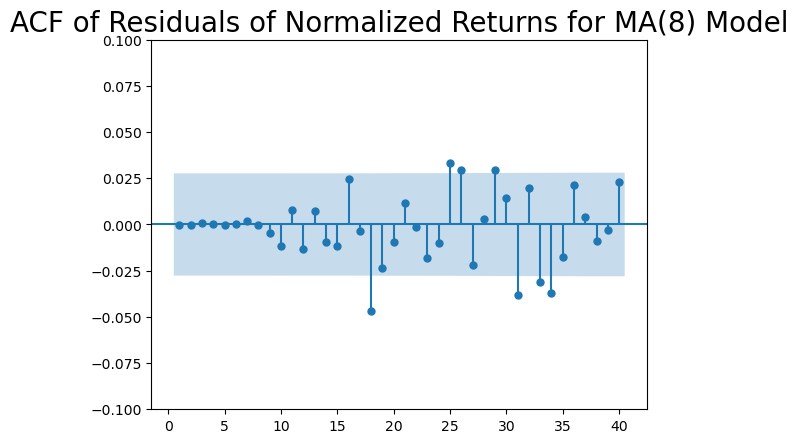

In [107]:
# acf for normalized returns for res_norm_ret_ma_8
sgt.plot_acf(df.res_norm_ret_ma_8, lags=40, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('ACF of Residuals of Normalized Returns for MA(8) Model', size=20)
plt.show()

### MA Models for prices

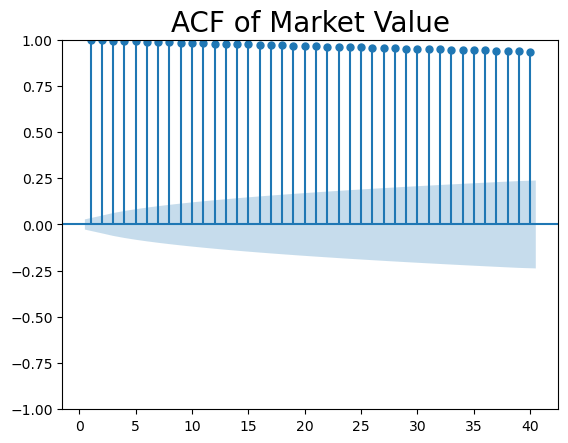

In [108]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
#plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('ACF of Market Value', size=20)
plt.show()

This suggest that we need infinite lags for MA model and the MA model is not a good predictor of prices

In [109]:
model_ma_1 = ARIMA(df.market_value, order=(0, 0, 1))
results_ma_1 = model_ma_1.fit()
print(results_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -38620.627
Date:                Mon, 04 Aug 2025   AIC                          77247.253
Time:                        20:06:03   BIC                          77266.817
Sample:                    01-10-1994   HQIC                         77254.109
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9580     15.768    322.812      0.000    5059.054    5120.862
ma.L1          0.9573      0.004    232.393      0.000       0.949       0.965
sigma2      2.804e+05   8087.126     34.675      0.0

# ARMA Model

### ARIMA(1,1)

In [110]:
model_ret_ar_1_ma_1 = ARIMA(df.returns, order=(1, 0, 1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
print(results_ret_ar_1_ma_1.summary())

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7916.500
Date:                Mon, 04 Aug 2025   AIC                          15841.000
Time:                        20:06:05   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1          0.7650      0.045     16.995      0.000       0.677       0.853
ma.L1         -0.8142      0.040    -20.187      0.0

In [111]:
model_ret_ar_1 = ARIMA(df.returns, order=(1, 0, 0))
model_ret_ma_1 = ARIMA(df.returns, order=(0, 0, 1))

In [112]:
print("\nARMA vs AR", llr_test(model_ret_ar_1, model_ret_ar_1_ma_1))
print("\nARMA vs MA", llr_test(model_ret_ma_1, model_ret_ar_1_ma_1))

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



ARMA vs AR 0.0


c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



ARMA vs MA 0.0


### Higher lag ARMA models

In [113]:
#ARMA(8,6) model
model_ret_ar_8_ma_6 = ARIMA(df.returns, order=(8, 0, 6))
results_ret_ar_8_ma_6 = model_ret_ar_8_ma_6.fit()   
print(results_ret_ar_8_ma_6.summary())

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(8, 0, 6)   Log Likelihood               -7883.726
Date:                Mon, 04 Aug 2025   AIC                          15799.452
Time:                        20:06:26   BIC                          15903.791
Sample:                    01-10-1994   HQIC                         15836.014
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.319      0.187      -0.009       0.047
ar.L1         -0.1425      5.879     -0.024      0.981     -11.665      11.380
ar.L2         -0.3951      3.883     -0.102      0.9

### fitting a complex model gives a lot of insignificant constants with p-value greater than 5%. So we can start with a simple model ARMA(3,3)

In [114]:
#ARMA(3,3) model
model_ret_ar_3_ma_3 = ARIMA(df.returns, order=(3, 0, 3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()
print(results_ret_ar_3_ma_3.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7893.515
Date:                Mon, 04 Aug 2025   AIC                          15803.030
Time:                        20:06:30   BIC                          15855.200
Sample:                    01-10-1994   HQIC                         15821.311
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.281      0.200      -0.010       0.048
ar.L1         -0.1880      0.068     -2.780      0.005      -0.321      -0.055
ar.L2         -0.2926      0.054     -5.380      0.0

In [115]:
llr_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF=4)

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


np.float64(0.0)

In [116]:
#ARMA(2,2) model
model_ret_ar_2_ma_2 = ARIMA(df.returns, order=(2, 0, 2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
print(results_ret_ar_2_ma_2.summary())
llr_test(model_ret_ar_2_ma_2, model_ret_ar_3_ma_3, DF=2)

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7914.692
Date:                Mon, 04 Aug 2025   AIC                          15841.384
Time:                        20:06:40   BIC                          15880.511
Sample:                    01-10-1994   HQIC                         15855.095
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1         -0.0969      0.091     -1.068      0.286      -0.275       0.081
ar.L2          0.6975      0.066     10.509      0.0

np.float64(0.0)

Just because we are getting  significant LLR test for higher lag models, doesn't mean that higher lag models are better. We should also check for pvalue for the co efficients.

In [117]:
#ARMA(3,2) model
model_ret_ar_3_ma_2 = ARIMA(df.returns, order=(3, 0, 2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
print(results_ret_ar_3_ma_2.summary())
llr_test(model_ret_ar_2_ma_2, model_ret_ar_3_ma_2, DF=1)

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -7895.747
Date:                Mon, 04 Aug 2025   AIC                          15805.495
Time:                        20:06:55   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.211      0.226      -0.012       0.049
ar.L1         -0.6778      0.055    -12.298      0.000      -0.786      -0.570
ar.L2         -0.5082      0.063     -8.035      0.0

np.float64(0.0)

In [118]:
#ARMA(2,3) model
model_ret_ar_2_ma_3 = ARIMA(df.returns, order=(2, 0, 3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
print(results_ret_ar_2_ma_3.summary())
llr_test(model_ret_ar_2_ma_2, model_ret_ar_2_ma_3, DF=1)

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -7895.587
Date:                Mon, 04 Aug 2025   AIC                          15805.175
Time:                        20:07:09   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.015      1.224      0.221      -0.011       0.049
ar.L1         -0.5600      0.057     -9.777      0.000      -0.672      -0.448
ar.L2         -0.4178      0.065     -6.381      0.0

np.float64(0.0)

In [119]:
#ARMA(3,1) model
model_ret_ar_3_ma_1 = ARIMA(df.returns, order=(3, 0, 1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
print(results_ret_ar_3_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -7899.072
Date:                Mon, 04 Aug 2025   AIC                          15810.144
Time:                        20:07:20   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.248      0.212      -0.011       0.048
ar.L1         -0.5074      0.062     -8.155      0.000      -0.629      -0.385
ar.L2         -0.0638      0.009     -7.027      0.0

In [120]:
llr_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)

np.float64(0.0099)

In [121]:
#ARMA(1,3) model
model_ret_ar_1_ma_3 = ARIMA(df.returns, order=(1, 0, 3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
print(results_ret_ar_1_ma_3.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -7896.838
Date:                Mon, 04 Aug 2025   AIC                          15805.676
Time:                        20:07:29   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.265      0.206      -0.010       0.048
ar.L1         -0.4693      0.060     -7.878      0.000      -0.586      -0.353
ma.L1          0.4469      0.060      7.437      0.0

In [122]:
# print llf and aic for ARMA(3,2) and ARMA(1,3)
print("\n ARMA(3,2) LLF: \tLL=", results_ret_ar_3_ma_2.llf, "\tAIC:", results_ret_ar_3_ma_2.aic)
print("\n ARMA(1,3) LLF: \tLL", results_ret_ar_1_ma_3.llf, "\tAIC:", results_ret_ar_1_ma_3.aic)


 ARMA(3,2) LLF: 	LL= -7895.747490025123 	AIC: 15805.494980050245

 ARMA(1,3) LLF: 	LL -7896.83790920576 	AIC: 15805.67581841152


Lower AIC indicates ARMA(3,2) is a better model than ARMA(1,3)

### Residuals for returns

In [123]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid

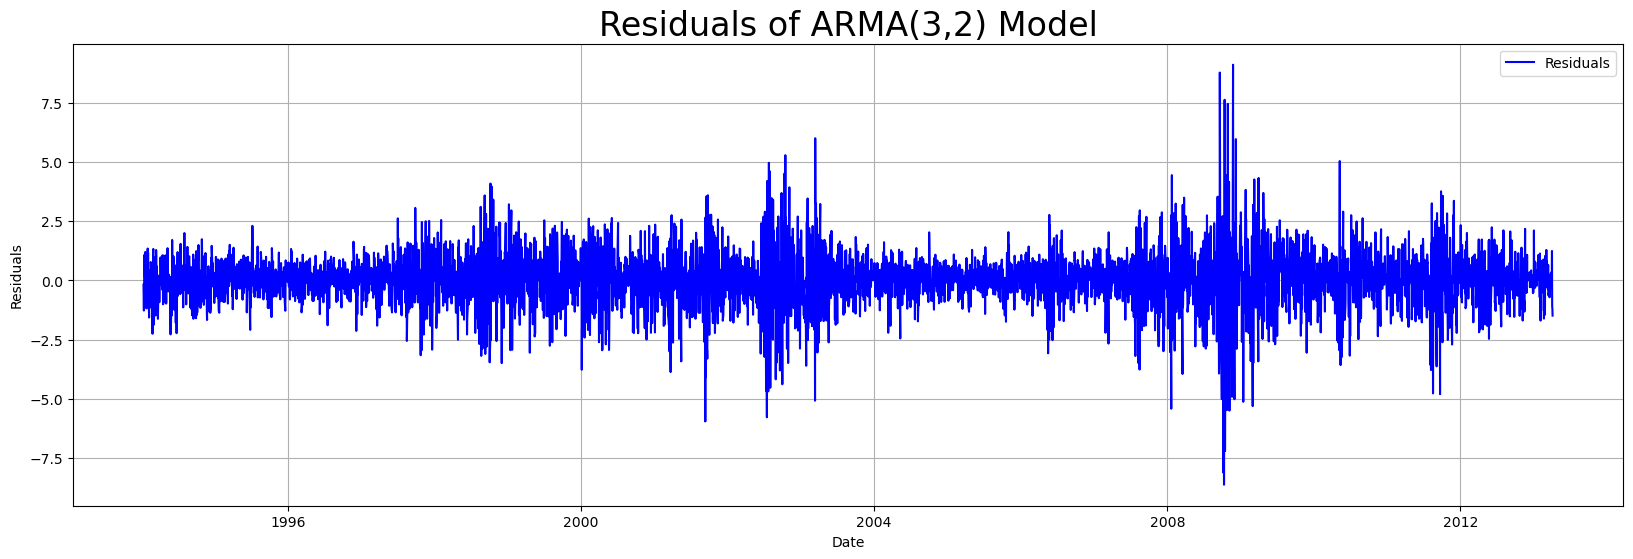

In [124]:
#plot the residuals for ARMA(3,2)
plt.figure(figsize=(20, 6))
plt.plot(df.index, df.res_ret_ar_3_ma_2, label='Residuals', color='blue')
plt.title('Residuals of ARMA(3,2) Model', size = 24)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'ACF of Residuals of ARMA(3,2) Model')

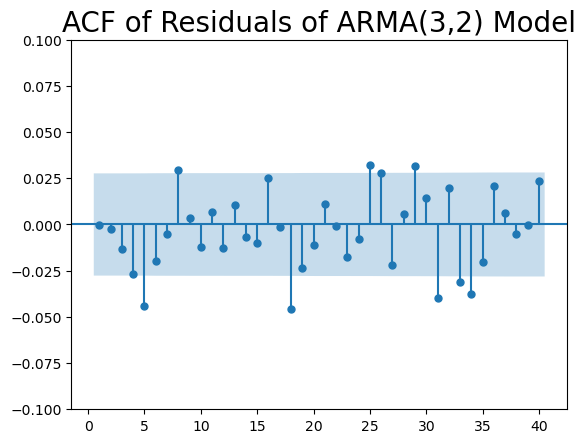

In [125]:
#plot the acf of residuals for ARMA(3,2)
sgt.plot_acf(df.res_ret_ar_3_ma_2, lags=40, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis  
plt.title('ACF of Residuals of ARMA(3,2) Model', size=20)

* **The above ACF shows that there are some pattern in the residuaals time series, which meant there is a factor we hadn't accounted for in our regression**
* **Now we will check all different ARMA(5,5) models and compare the ARMA(3,2) to choose the final model. After choosing the 

### Reevaluating Model Selection

In [126]:
# ARMA(5,5) model
model_ret_ar_5_ma_5 = ARIMA(df.returns, order=(5, 0, 5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
print(results_ret_ar_5_ma_5.summary())

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -7883.183
Date:                Mon, 04 Aug 2025   AIC                          15790.366
Time:                        20:07:42   BIC                          15868.620
Sample:                    01-10-1994   HQIC                         15817.787
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0242      0.015      1.640      0.101      -0.005       0.053
ar.L1         -0.0146      0.127     -0.115      0.908      -0.263       0.234
ar.L2         -0.5132      0.081     -6.318      0.0

Taking both returns and residuals 5 periods ago is redundant. So we should only focus on one of the two

In [127]:
# ARMA(1,5) model
# ARMA(2,5) model
# ARMA(3,5) model
# ARMA(4,5) model

model_ret_ar_1_ma_5 = ARIMA(df.returns, order=(1, 0, 5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
print(results_ret_ar_1_ma_5.summary())

model_ret_ar_2_ma_5 = ARIMA(df.returns, order=(2, 0, 5))
results_ret_ar_2_ma_5 = model_ret_ar_2_ma_5.fit()
print(results_ret_ar_2_ma_5.summary())

model_ret_ar_3_ma_5 = ARIMA(df.returns, order=(3, 0, 5))
results_ret_ar_3_ma_5 = model_ret_ar_3_ma_5.fit()
print(results_ret_ar_3_ma_5.summary())

model_ret_ar_4_ma_5 = ARIMA(df.returns, order=(4, 0, 5))
results_ret_ar_4_ma_5 = model_ret_ar_4_ma_5.fit()
print(results_ret_ar_4_ma_5.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -7890.974
Date:                Mon, 04 Aug 2025   AIC                          15797.949
Time:                        20:07:44   BIC                          15850.118
Sample:                    01-10-1994   HQIC                         15816.230
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.297      0.194      -0.010       0.047
ar.L1          0.3218      0.133      2.415      0.016       0.061       0.583
ma.L1         -0.3467      0.134     -2.593      0.0

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 5)   Log Likelihood               -7883.925
Date:                Mon, 04 Aug 2025   AIC                          15787.850
Time:                        20:08:00   BIC                          15853.062
Sample:                    01-10-1994   HQIC                         15810.701
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.259      0.208      -0.011       0.048
ar.L1         -0.1153      0.079     -1.458      0.145      -0.270       0.040
ar.L2         -0.8783      0.019    -45.294      0.0

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(4, 0, 5)   Log Likelihood               -7882.728
Date:                Mon, 04 Aug 2025   AIC                          15787.455
Time:                        20:08:11   BIC                          15859.189
Sample:                    01-10-1994   HQIC                         15812.592
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.285      0.199      -0.010       0.048
ar.L1          0.0225      0.081      0.276      0.782      -0.137       0.182
ar.L2         -0.6458      0.077     -8.371      0.0

In [128]:
# ARMA(5,1) model
# ARMA(5,2) model
# ARMA(5,3) model
# ARMA(5,4) model

model_ret_ar_5_ma_1 = ARIMA(df.returns, order=(5, 0, 1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
print(results_ret_ar_5_ma_1.summary())

model_ret_ar_5_ma_2 = ARIMA(df.returns, order=(5, 0, 2))
results_ret_ar_5_ma_2 = model_ret_ar_5_ma_2.fit()
print(results_ret_ar_5_ma_2.summary())

model_ret_ar_5_ma_3 = ARIMA(df.returns, order=(5, 0, 3))
results_ret_ar_5_ma_3 = model_ret_ar_5_ma_3.fit()
print(results_ret_ar_5_ma_3.summary())

model_ret_ar_5_ma_4 = ARIMA(df.returns, order=(5, 0, 4))
results_ret_ar_5_ma_4 = model_ret_ar_5_ma_4.fit()
print(results_ret_ar_5_ma_4.summary())


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -7889.311
Date:                Mon, 04 Aug 2025   AIC                          15794.623
Time:                        20:08:13   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.301      0.193      -0.010       0.047
ar.L1          0.3449      0.105      3.270      0.001       0.138       0.552
ar.L2         -0.0458      0.009     -4.852      0.0

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -7885.667
Date:                Mon, 04 Aug 2025   AIC                          15789.334
Time:                        20:08:21   BIC                          15848.024
Sample:                    01-10-1994   HQIC                         15809.900
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.286      0.198      -0.010       0.048
ar.L1          0.2971      0.079      3.746      0.000       0.142       0.453
ar.L2         -0.4726      0.077     -6.102      0.0

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -7883.865
Date:                Mon, 04 Aug 2025   AIC                          15789.730
Time:                        20:08:40   BIC                          15861.463
Sample:                    01-10-1994   HQIC                         15814.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.283      0.200      -0.010       0.048
ar.L1          0.1339      0.082      1.634      0.102      -0.027       0.295
ar.L2         -0.6063      0.080     -7.597      0.0

* After fitting the data with all combinations of ARMA(5,5) model, we can conclude that ARMA(5,1) and ARMA(1,5) is better models

* Since both the two models have same degree of freedom, we cannot use LLR test. We must compare their log likelihood and AIC values

In [129]:
# print llf and aic for ARMA(5,1) and ARMA(1,5)
print("\n ARMA(5,1) LLF: \tLL=", results_ret_ar_5_ma_1.llf, "\tAIC:", results_ret_ar_5_ma_1.aic)
print("\n ARMA(1,5) LLF: \tLL", results_ret_ar_1_ma_5.llf, "\tAIC:", results_ret_ar_1_ma_5.aic)


 ARMA(5,1) LLF: 	LL= -7889.311305453492 	AIC: 15794.622610906985

 ARMA(1,5) LLF: 	LL -7890.974434537848 	AIC: 15797.948869075695


* So from the AIC and LLF value, we chose the model which has a lower AIC and higher llf. 
* Therefore, **ARMA(5,1) > ARMA(1,5)**
* Now we have to compare **ARMA(5,1) and ARMA(3,2)** models and take a final decision on which model to use

In [130]:
# aic and llf  for ARMA(3,2) and ARMA(5,1)
print("\n ARMA(3,2) LLF: \tLL=", results_ret_ar_3_ma_2.llf, "\tAIC:", results_ret_ar_3_ma_2.aic)
print("\n ARMA(5,1) LLF: \tLL", results_ret_ar_5_ma_1.llf, "\tAIC:", results_ret_ar_5_ma_1.aic)


 ARMA(3,2) LLF: 	LL= -7895.747490025123 	AIC: 15805.494980050245

 ARMA(5,1) LLF: 	LL -7889.311305453492 	AIC: 15794.622610906985


* **ARMA(5,1) model** is the winner!!!!!!!!

### Residuals for the new model

In [131]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

<Figure size 2000x600 with 0 Axes>

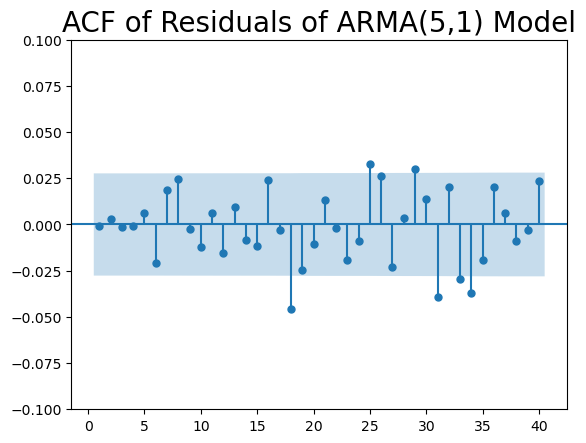

<Figure size 2000x600 with 0 Axes>

In [132]:
sgt.plot_acf(df.res_ret_ar_5_ma_1, lags=40, zero=False)
plt.title('ACF of Residuals of ARMA(5,1) Model', size=20)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.figure(figsize=(20, 6))


Why check the ACF of residuals?
Because in a good time series model, the residuals should resemble white noise — i.e.:

No autocorrelation left in the residuals.

Zero mean, constant variance.

Essentially, nothing left to model.



### ARMA model for prices(Non stationary data)

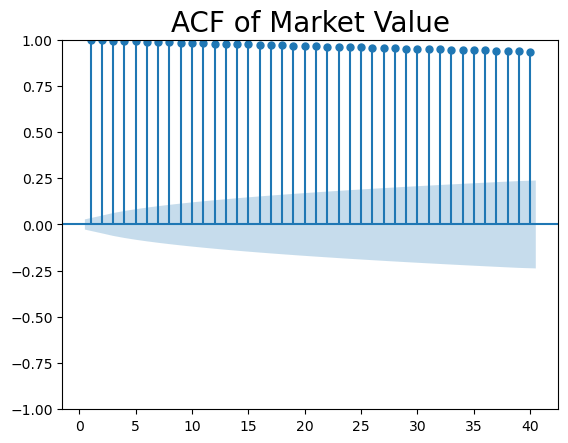

In [133]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title('ACF of Market Value', size=20)

plt.show()

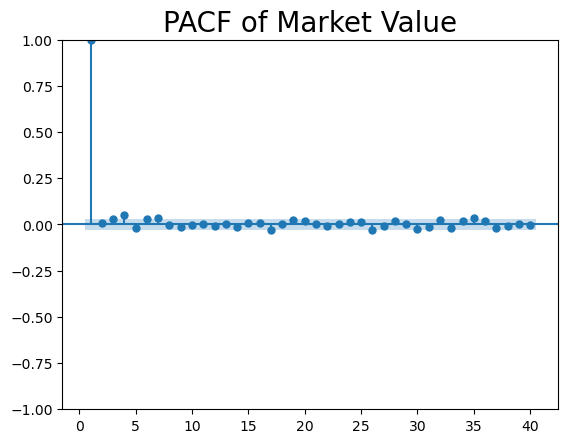

In [134]:
sgt.plot_pacf(df.market_value, lags=40, zero=False)
plt.title('PACF of Market Value', size=20)
plt.show()

In [135]:
model_ar_1_ma_1 = ARIMA(df.market_value, order=(1, 0, 1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
print(results_ar_1_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27616.881
Date:                Mon, 04 Aug 2025   AIC                          55241.761
Time:                        20:08:41   BIC                          55267.846
Sample:                    01-10-1994   HQIC                         55250.902
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9683    363.335     14.009      0.000    4377.844    5802.092
ar.L1          0.9982      0.001   1191.532      0.000       0.997       1.000
ma.L1         -0.0186      0.010     -1.892      0.0

In [136]:
model_ar_6_ma_6 = ARIMA(df.market_value, order=(6, 0, 6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit()
print(results_ar_6_ma_6.summary())

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(6, 0, 6)   Log Likelihood              -27586.274
Date:                Mon, 04 Aug 2025   AIC                          55200.549
Time:                        20:08:56   BIC                          55291.845
Sample:                    01-10-1994   HQIC                         55232.540
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9682    509.520      9.990      0.000    4091.327    6088.609
ar.L1          0.7364      0.868      0.848      0.396      -0.965       2.438
ar.L2          0.2502      1.458      0.172      0.8

In [137]:
# ARMA(6,1) model
# ARMA(6,2) model
# ARMA(6,3) model
# ARMA(6,4) model
# ARMA(6,5) model
model_ar_6_ma_1 = ARIMA(df.market_value, order=(6, 0, 1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit()
print(results_ar_6_ma_1.summary())

model_ar_6_ma_2 = ARIMA(df.market_value, order=(6, 0, 2))
results_ar_6_ma_2 = model_ar_6_ma_2.fit()
print(results_ar_6_ma_2.summary())

model_ar_6_ma_3 = ARIMA(df.market_value, order=(6, 0, 3))
results_ar_6_ma_3 = model_ar_6_ma_3.fit()
print(results_ar_6_ma_3.summary())

model_ar_6_ma_4 = ARIMA(df.market_value, order=(6, 0, 4))
results_ar_6_ma_4 = model_ar_6_ma_4.fit()
print(results_ar_6_ma_4.summary())

model_ar_6_ma_5 = ARIMA(df.market_value, order=(6, 0, 5))
results_ar_6_ma_5 = model_ar_6_ma_5.fit()
print(results_ar_6_ma_5.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(6, 0, 1)   Log Likelihood              -27589.193
Date:                Mon, 04 Aug 2025   AIC                          55196.385
Time:                        20:09:06   BIC                          55255.076
Sample:                    01-10-1994   HQIC                         55216.951
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9581    524.971      9.696      0.000    4061.035    6118.881
ar.L1          1.3933      0.157      8.850      0.000       1.085       1.702
ar.L2         -0.4380      0.154     -2.852      0.0

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(6, 0, 3)   Log Likelihood              -27590.632
Date:                Mon, 04 Aug 2025   AIC                          55203.265
Time:                        20:09:30   BIC                          55274.998
Sample:                    01-10-1994   HQIC                         55228.401
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9680    433.911     11.730      0.000    4239.518    5940.418
ar.L1          0.0747      0.272      0.275      0.783      -0.458       0.607
ar.L2         -0.0385      0.073     -0.525      0.5

In [138]:
# ARMA(1,6) model
# ARMA(2,6) model
# ARMA(3,6) model
# ARMA(4,6) model
# ARMA(5,6) model

model_ar_1_ma_6 = ARIMA(df.market_value, order=(1, 0, 6))
results_ar_1_ma_6 = model_ar_1_ma_6.fit()
print(results_ar_1_ma_6.summary())

model_ar_2_ma_6 = ARIMA(df.market_value, order=(2, 0, 6))
results_ar_2_ma_6 = model_ar_2_ma_6.fit()
print(results_ar_2_ma_6.summary())

model_ar_3_ma_6 = ARIMA(df.market_value, order=(3, 0, 6))
results_ar_3_ma_6 = model_ar_3_ma_6.fit()
print(results_ar_3_ma_6.summary())

model_ar_4_ma_6 = ARIMA(df.market_value, order=(4, 0, 6))
results_ar_4_ma_6 = model_ar_4_ma_6.fit()
print(results_ar_4_ma_6.summary())

model_ar_5_ma_6 = ARIMA(df.market_value, order=(5, 0, 6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit()
print(results_ar_5_ma_6.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 0, 6)   Log Likelihood              -27588.239
Date:                Mon, 04 Aug 2025   AIC                          55194.478
Time:                        20:09:42   BIC                          55253.169
Sample:                    01-10-1994   HQIC                         55215.044
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9683    425.725     11.956      0.000    4255.563    5924.374
ar.L1          0.9988      0.001   1438.007      0.000       0.997       1.000
ma.L1         -0.0192      0.010     -1.883      0.0

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(3, 0, 6)   Log Likelihood              -27584.836
Date:                Mon, 04 Aug 2025   AIC                          55191.673
Time:                        20:09:58   BIC                          55263.406
Sample:                    01-10-1994   HQIC                         55216.809
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9680   2997.117      1.698      0.089    -784.273     1.1e+04
ar.L1          1.1875      0.045     26.136      0.000       1.098       1.277
ar.L2         -1.0479      0.068    -15.512      0.0

* **ARMA(6,2) and ARMA(1,6) both have significant coefficients**
* **We will examine thee llf and AIC for the both models**

In [139]:
# print the AIC and LLF for the ARMA(6,2) and ARMA(1,6)
print("\n ARMA(6,2) LLF: \tLL=", results_ar_6_ma_2.llf, "\tAIC:", results_ar_6_ma_2.aic)
print("\n ARMA(1,6) LLF: \tLL", results_ar_1_ma_6.llf, "\tAIC:", results_ar_1_ma_6.aic)
#print("\n ARMA(5,6) LLF: \tLL", results_ar_5_ma_6.llf, "\tAIC:", results_ar_5_ma_6.aic)


 ARMA(6,2) LLF: 	LL= -27585.59561414569 	AIC: 55191.19122829138

 ARMA(1,6) LLF: 	LL -27588.239080721214 	AIC: 55194.47816144243


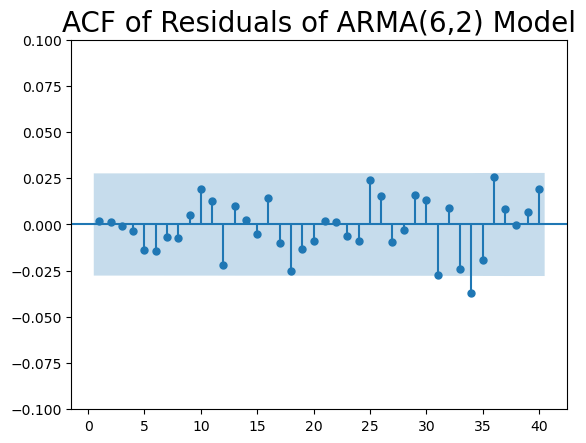

In [140]:
df['res_ar_6_ma_2'] = results_ar_6_ma_2.resid
# plot the acf of residuals for ARMA(6,2)
sgt.plot_acf(df.res_ar_6_ma_2, lags=40, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis  
plt.title('ACF of Residuals of ARMA(6,2) Model', size=20)
plt.show()

* So as of now we have modelled using both price and returns. **ARMA(5,1)** for returns and **ARMA(6,2)** for prices.
* Now we should compare both the models

### ARMA for returns vs ARMA for prices

In [141]:
# print the llf and aic for ARMA(5,1) for returns and ARMA(6,2) for market value
print("\n ARMA(5,1) LLF: \tLL=", results_ret_ar_5_ma_1.llf, "\tAIC:", results_ret_ar_5_ma_1.aic)
print("\n ARMA(6,2) LLF: \tLL", results_ar_6_ma_2.llf, "\tAIC:", results_ar_6_ma_2.aic)


 ARMA(5,1) LLF: 	LL= -7889.311305453492 	AIC: 15794.622610906985

 ARMA(6,2) LLF: 	LL -27585.59561414569 	AIC: 55191.19122829138


# Evevthough we can model prices using ARMA models, they perform much worse compared to their ability to estimate stationary data

# ARIMA Model

In [168]:
df = pd.read_csv("Index2018.csv")
df.date = pd.to_datetime(df.date, dayfirst=True)
df.set_index('date', inplace=True)
df = df.asfreq('b')  # setting the Desired Frequency
df= df.fillna(method='ffill')  # fill missing values with forward fill
df['market_value'] = df.ftse
# Delete columns dax, ftse, nikkei and rename spx to market_value
df.drop(['dax', 'ftse', 'nikkei', 'spx'], axis=1, inplace=True)

size = int(len(df) * 0.8)
df, df_test = df[:size], df[size:]

df['returns'] = df.market_value.pct_change(1)*100
# Remove NaN values from the DataFrame
df.dropna(inplace=True)
df

C:\Users\Niranjan\AppData\Local\Temp\ipykernel_23772\503749443.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill')  # fill missing values with forward fill


,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842
...,...,...
2013-04-01,6411.74,0.000000
2013-04-02,6490.66,1.230867
2013-04-03,6420.28,-1.084327


### ARIMA(1,1,1)

In [143]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1, 1, 1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
print(results_ar_1_i_1_ma_1.summary())

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27599.000
Date:                Mon, 04 Aug 2025   AIC                          55203.999
Time:                        20:10:23   BIC                          55223.562
Sample:                    01-10-1994   HQIC                         55210.854
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7466      0.059     12.692      0.000       0.631       0.862
ma.L1         -0.7925      0.053    -14.970      0.000      -0.896      -0.689
sigma2      3497.8900     40.914     85.494      0.0

### Residuals of the ARIMA(1,1,1)

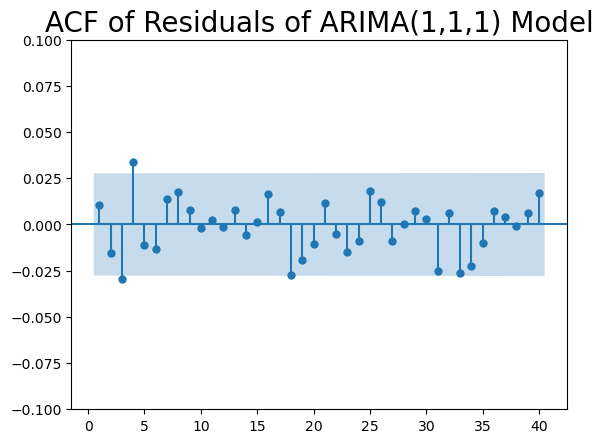

In [144]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, lags=40, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('ACF of Residuals of ARIMA(1,1,1) Model', size=20)
plt.show()

* since the 3rd and 4th lags are significant, we can try to fit upto 4 lags of combination in the ARIMA model and pick the best performing model

### Higher lag ARIMA Models

In [145]:
# ARIMA(1,1,1) model

model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1, 1, 1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
print(results_ar_1_i_1_ma_1.summary())

# ARIMA(2,1,1) model
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2, 1, 1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
print(results_ar_2_i_1_ma_1.summary())

# ARIMA(3,1,1) model
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3, 1, 1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
print(results_ar_3_i_1_ma_1.summary())

# ARIMA(4,1,1) model
model_ar_4_i_1_ma_1 = ARIMA(df.market_value, order=(4, 1, 1))
results_ar_4_i_1_ma_1 = model_ar_4_i_1_ma_1.fit()
print(results_ar_4_i_1_ma_1.summary())


c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27599.000
Date:                Mon, 04 Aug 2025   AIC                          55203.999
Time:                        20:10:24   BIC                          55223.562
Sample:                    01-10-1994   HQIC                         55210.854
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7466      0.059     12.692      0.000       0.631       0.862
ma.L1         -0.7925      0.053    -14.970      0.000      -0.896      -0.689
sigma2      3497.8900     40.914     85.494      0.0

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -27595.127
Date:                Mon, 04 Aug 2025   AIC                          55198.255
Time:                        20:10:25   BIC                          55224.338
Sample:                    01-10-1994   HQIC                         55207.395
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6282      0.071      8.894      0.000       0.490       0.767
ar.L2         -0.0471      0.011     -4.222      0.000      -0.069      -0.025
ma.L1         -0.6511      0.069     -9.407      0.0

In [146]:
# ARIMA(1,1,2) model
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1, 1, 2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
print(results_ar_1_i_1_ma_2.summary())

# ARIMA(2,1,2) model
model_ar_2_i_1_ma_2 = ARIMA(df.market_value, order=(2, 1, 2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()
print(results_ar_2_i_1_ma_2.summary())

# ARIMA(3,1,2) model
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3, 1, 2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()
print(results_ar_3_i_1_ma_2.summary())

# ARIMA(4,1,2) model
model_ar_4_i_1_ma_2 = ARIMA(df.market_value, order=(4, 1, 2))
results_ar_4_i_1_ma_2 = model_ar_4_i_1_ma_2.fit()
print(results_ar_4_i_1_ma_2.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -27595.404
Date:                Mon, 04 Aug 2025   AIC                          55198.808
Time:                        20:10:29   BIC                          55224.892
Sample:                    01-10-1994   HQIC                         55207.948
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5872      0.079      7.431      0.000       0.432       0.742
ma.L1         -0.6115      0.078     -7.820      0.000      -0.765      -0.458
ma.L2         -0.0457      0.012     -3.945      0.0

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -27586.062
Date:                Mon, 04 Aug 2025   AIC                          55186.123
Time:                        20:10:35   BIC                          55231.770
Sample:                    01-10-1994   HQIC                         55202.119
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3314      0.238      1.392      0.164      -0.135       0.798
ar.L2          0.3164      0.095      3.340      0.001       0.131       0.502
ar.L3         -0.0533      0.016     -3.366      0.0

In [147]:
# ARIMA(1,1,3) model
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1, 1, 3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
print(results_ar_1_i_1_ma_3.summary())

# ARIMA(2,1,3) model
model_ar_2_i_1_ma_3 = ARIMA(df.market_value, order=(2, 1, 3))
results_ar_2_i_1_ma_3 = model_ar_2_i_1_ma_3.fit()
print(results_ar_2_i_1_ma_3.summary())

# ARIMA(3,1,3) model
model_ar_3_i_1_ma_3 = ARIMA(df.market_value, order=(3, 1, 3))
results_ar_3_i_1_ma_3 = model_ar_3_i_1_ma_3.fit()
print(results_ar_3_i_1_ma_3.summary())

# ARIMA(4,1,3) model
model_ar_4_i_1_ma_3 = ARIMA(df.market_value, order=(4, 1, 3))
results_ar_4_i_1_ma_3 = model_ar_4_i_1_ma_3.fit()
print(results_ar_4_i_1_ma_3.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -27585.711
Date:                Mon, 04 Aug 2025   AIC                          55181.422
Time:                        20:10:36   BIC                          55214.026
Sample:                    01-10-1994   HQIC                         55192.847
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3593      0.087     -4.110      0.000      -0.531      -0.188
ma.L1          0.3395      0.087      3.902      0.000       0.169       0.510
ma.L2         -0.0589      0.010     -5.997      0.0

In [148]:
# ARIMA(1,1,4) model
model_ar_1_i_1_ma_4 = ARIMA(df.market_value, order=(1, 1, 4))
results_ar_1_i_1_ma_4 = model_ar_1_i_1_ma_4.fit()
print(results_ar_1_i_1_ma_4.summary())

# ARIMA(2,1,4) model
model_ar_2_i_1_ma_4 = ARIMA(df.market_value, order=(2, 1, 4))
results_ar_2_i_1_ma_4 = model_ar_2_i_1_ma_4.fit()
print(results_ar_2_i_1_ma_4.summary())

# ARIMA(3,1,4) model
model_ar_3_i_1_ma_4 = ARIMA(df.market_value, order=(3, 1, 4))
results_ar_3_i_1_ma_4 = model_ar_3_i_1_ma_4.fit()
print(results_ar_3_i_1_ma_4.summary())

# ARIMA(4,1,4) model
model_ar_4_i_1_ma_4 = ARIMA(df.market_value, order=(4, 1, 4))
results_ar_4_i_1_ma_4 = model_ar_4_i_1_ma_4.fit()
print(results_ar_4_i_1_ma_4.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 4)   Log Likelihood              -27585.641
Date:                Mon, 04 Aug 2025   AIC                          55183.282
Time:                        20:10:46   BIC                          55222.408
Sample:                    01-10-1994   HQIC                         55196.993
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2832      0.249     -1.137      0.255      -0.771       0.205
ma.L1          0.2633      0.251      1.050      0.294      -0.228       0.755
ma.L2         -0.0575      0.010     -5.643      0.0

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -27581.180
Date:                Mon, 04 Aug 2025   AIC                          55180.359
Time:                        20:10:56   BIC                          55239.048
Sample:                    01-10-1994   HQIC                         55200.925
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6609      0.422     -1.564      0.118      -1.489       0.167
ar.L2         -0.2340      0.160     -1.465      0.143      -0.547       0.079
ar.L3          0.2658      0.121      2.188      0.0

* out of all these 16 combinations of the ARIMA Models, only 6 models are significant

* **ARIMA(1,1,2), ARIMA(1,1,3), ARIMA(2,1,1), ARIMA(3,1,1), ARIMA(3,1,2), ARIMA(1,1,1)**

In [149]:
# printing the AIC and LLF for the ARIMA(1,1,2), ARIMA(1,1,3), ARIMA(2,1,1), ARIMA(3,1,1), ARIMA(3,1,2), ARIMA(1,1,1)

print("\n ARIMA(1,1,2) LLF: \tLL=", results_ar_1_i_1_ma_2.llf, "\t AIC=", results_ar_1_i_1_ma_2.aic)
print("\n ARIMA(1,1,3) LLF: \tLL=", results_ar_1_i_1_ma_3.llf, "\t AIC=", results_ar_1_i_1_ma_3.aic)
print("\n ARIMA(2,1,1) LLF: \tLL=", results_ar_2_i_1_ma_1.llf, "\t AIC=", results_ar_2_i_1_ma_1.aic)
print("\n ARIMA(3,1,1) LLF: \tLL=", results_ar_3_i_1_ma_1.llf, "\t AIC=", results_ar_3_i_1_ma_1.aic)
print("\n ARIMA(3,1,2) LLF: \tLL=", results_ar_3_i_1_ma_2.llf, "\t AIC=", results_ar_3_i_1_ma_2.aic)
print("\n ARIMA(1,1,1) LLF: \tLL=", results_ar_1_i_1_ma_1.llf, "\t AIC=", results_ar_1_i_1_ma_1.aic)  


 ARIMA(1,1,2) LLF: 	LL= -27595.404101137217 	 AIC= 55198.808202274435

 ARIMA(1,1,3) LLF: 	LL= -27585.71077370961 	 AIC= 55181.42154741922

 ARIMA(2,1,1) LLF: 	LL= -27595.127257741275 	 AIC= 55198.25451548255

 ARIMA(3,1,1) LLF: 	LL= -27587.32166047273 	 AIC= 55184.64332094546

 ARIMA(3,1,2) LLF: 	LL= -27585.902579926034 	 AIC= 55183.80515985207

 ARIMA(1,1,1) LLF: 	LL= -27598.999612045984 	 AIC= 55203.99922409197


* ARIMA(1,1,3) has the lowest AIC and highest LLF value, this models wins. Since ARIMA(1,1,1), ARIMA(1,1,2), ARIMA(1,1,3)  are nested models, we have to run a  LLR test to find the most significant model.

In [150]:
# llr test for ARIMA(1,1,2) and ARIMA(1,1,3)
print("\n LLR test for ARIMA(1,1,2) and ARIMA(1,1,3):", llr_test(model_ar_1_i_1_ma_2, model_ar_1_i_1_ma_3, DF=1))


 LLR test for ARIMA(1,1,2) and ARIMA(1,1,3): 0.0


In [151]:
#llr test for ARIMA(1,1,1) and ARIMA(1,1,3)

print("\n LLR test for ARIMA(1,1,1) and ARIMA(1,1,3):", llr_test(model_ar_1_i_1_ma_1, model_ar_1_i_1_ma_3, DF=2))

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



 LLR test for ARIMA(1,1,1) and ARIMA(1,1,3): 0.0


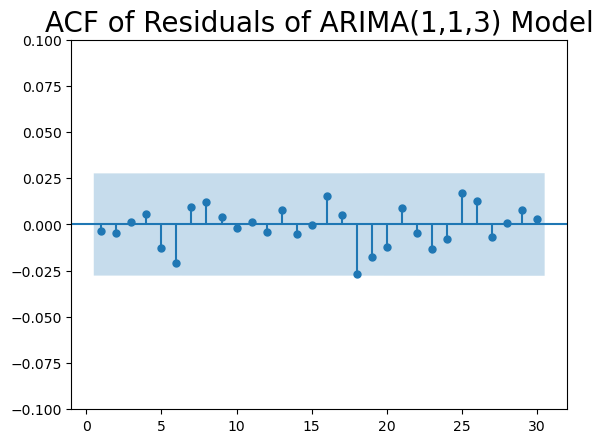

In [152]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
# plot the acf of the residuals for ARIMA(1,1,3)
sgt.plot_acf(df.res_ar_1_i_1_ma_3, lags=30, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('ACF of Residuals of ARIMA(1,1,3) Model', size=20)
plt.show()

### Fitting more higher lag models

In [153]:
from statsmodels.tsa.arima.model import ARIMA

d = 1
target_combos = []

# (5,1,1 to 6)
target_combos += [(5, d, q) for q in range(1, 7)]

# (1 to 6,1,5)
target_combos += [(p, d, 5) for p in range(1, 7)]

# (6,1,1 to 6)
target_combos += [(6, d, q) for q in range(1, 7)]

# (1 to 6,1,6)
target_combos += [(p, d, 6) for p in range(1, 7)]

# Remove duplicates, sort for neatness
target_combos = list(set(target_combos))
target_combos.sort()

# Run the models
for p, d, q in target_combos:
    try:
        print(f"\nFitting ARIMA({p},{d},{q}) model...")
        model = ARIMA(df.market_value, order=(p, d, q))
        results = model.fit()
        print(results.summary())
    except Exception as e:
        print(f"ARIMA({p},{d},{q}) failed: {e}")



Fitting ARIMA(1,1,5) model...
                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 5)   Log Likelihood              -27582.616
Date:                Mon, 04 Aug 2025   AIC                          55179.232
Time:                        20:11:02   BIC                          55224.878
Sample:                    01-10-1994   HQIC                         55195.227
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3604      0.212      1.703      0.089      -0.054       0.775
ma.L1         -0.3818      0.212     -1.803      0.071      -0.797       0.033
ma.L2         -0.0410

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(2, 1, 6)   Log Likelihood              -27576.317
Date:                Mon, 04 Aug 2025   AIC                          55170.633
Time:                        20:11:13   BIC                          55229.322
Sample:                    01-10-1994   HQIC                         55191.199
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1758      0.034      5.153      0.000       0.109       0.243
ar.L2         -0.8967      0.031    -28.500      0.000      -0.958      -0.835
ma.L1         -0.1960      0.035     -5.602      0.0

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(3, 1, 5)   Log Likelihood              -27576.348
Date:                Mon, 04 Aug 2025   AIC                          55170.697
Time:                        20:11:19   BIC                          55229.385
Sample:                    01-10-1994   HQIC                         55191.262
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0923      0.112      0.827      0.408      -0.126       0.311
ar.L2         -0.8777      0.031    -28.332      0.000      -0.938      -0.817
ar.L3         -0.0738      0.100     -0.736      0.4

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(4, 1, 5)   Log Likelihood              -27575.857
Date:                Mon, 04 Aug 2025   AIC                          55171.714
Time:                        20:11:32   BIC                          55236.924
Sample:                    01-10-1994   HQIC                         55194.565
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0509      0.108      0.472      0.637      -0.161       0.262
ar.L2         -0.6955      0.106     -6.543      0.000      -0.904      -0.487
ar.L3         -0.1458      0.099     -1.472      0.1

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -27579.435
Date:                Mon, 04 Aug 2025   AIC                          55174.869
Time:                        20:11:42   BIC                          55227.037
Sample:                    01-10-1994   HQIC                         55193.150
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4387      0.118      3.729      0.000       0.208       0.669
ar.L2         -0.4392      0.123     -3.582      0.000      -0.679      -0.199
ar.L3         -0.0612      0.013     -4.738      0.0

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 6)   Log Likelihood              -27578.949
Date:                Mon, 04 Aug 2025   AIC                          55181.898
Time:                        20:11:53   BIC                          55260.149
Sample:                    01-10-1994   HQIC                         55209.318
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0329      1.643     -0.020      0.984      -3.252       3.186
ar.L2         -0.1807      0.935     -0.193      0.847      -2.014       1.653
ar.L3         -0.2257      0.936     -0.241      0.8

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(6, 1, 5)   Log Likelihood              -27578.371
Date:                Mon, 04 Aug 2025   AIC                          55180.741
Time:                        20:12:10   BIC                          55258.993
Sample:                    01-10-1994   HQIC                         55208.162
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2580      1.098     -0.235      0.814      -2.409       1.893
ar.L2         -0.3471      0.315     -1.100      0.271      -0.965       0.271
ar.L3         -0.3154      0.579     -0.545      0.5

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(6, 1, 6)   Log Likelihood              -27576.399
Date:                Mon, 04 Aug 2025   AIC                          55178.797
Time:                        20:12:18   BIC                          55263.570
Sample:                    01-10-1994   HQIC                         55208.503
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1444      0.258     -0.559      0.576      -0.651       0.362
ar.L2         -0.1760      0.159     -1.105      0.269      -0.488       0.136
ar.L3         -0.1794      0.188     -0.956      0.3

In [154]:
# ARIMA(6,1,3) model
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6, 1, 3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()
print(results_ar_6_i_1_ma_3.summary())

# ARIMA(5,1,1) model
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5, 1, 1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()
print(results_ar_5_i_1_ma_1.summary())

# ARIMA(5,1,2) model
model_ar_5_i_1_ma_2 = ARIMA(df.market_value, order=(5, 1, 2))
results_ar_5_i_1_ma_2 = model_ar_5_i_1_ma_2.fit()
print(results_ar_5_i_1_ma_2.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(6, 1, 3)   Log Likelihood              -27578.852
Date:                Mon, 04 Aug 2025   AIC                          55177.703
Time:                        20:12:20   BIC                          55242.913
Sample:                    01-10-1994   HQIC                         55200.554
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0020      0.587     -0.003      0.997      -1.152       1.148
ar.L2         -0.3178      0.268     -1.186      0.236      -0.843       0.207
ar.L3         -0.1365      0.337     -0.405      0.6

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -27579.435
Date:                Mon, 04 Aug 2025   AIC                          55174.869
Time:                        20:12:24   BIC                          55227.037
Sample:                    01-10-1994   HQIC                         55193.150
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4387      0.118      3.729      0.000       0.208       0.669
ar.L2         -0.4392      0.123     -3.582      0.000      -0.679      -0.199
ar.L3         -0.0612      0.013     -4.738      0.0

In [155]:
#checking AIC and LLF for ARIMA(5,1,1) and ARIMA(1,1,3) and ARIMA(5,1,2)
print("\n ARIMA(5,1,1) LLF: \tLL=", results_ar_5_i_1_ma_1.llf, "\t AIC=", results_ar_5_i_1_ma_1.aic)
print("\n ARIMA(1,1,3) LLF: \tLL=", results_ar_1_i_1_ma_3.llf, "\t AIC=", results_ar_1_i_1_ma_3.aic)
print("\n ARIMA(5,1,2) LLF: \tLL=", results_ar_5_i_1_ma_2.llf, "\t AIC=", results_ar_5_i_1_ma_2.aic)


 ARIMA(5,1,1) LLF: 	LL= -27581.832334030274 	 AIC= 55177.66466806055

 ARIMA(1,1,3) LLF: 	LL= -27585.71077370961 	 AIC= 55181.42154741922

 ARIMA(5,1,2) LLF: 	LL= -27579.434697166653 	 AIC= 55174.869394333306


* **ARIMA(5,1,2)** has the lowest AIC and highest LL value, but before finalizing the model we have to do a llr test because **ARIMA(5,1,1) and ARIMA(5,1,2) are both nested models.**

In [156]:
# running the LLR test for ARIMA(5,1,1) and ARIMA(5,1,2)
print("\n LLR test for ARIMA(5,1,1) and ARIMA(5,1,2):", llr_test(model_ar_5_i_1_ma_1, model_ar_5_i_1_ma_2, DF=1))

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



 LLR test for ARIMA(5,1,1) and ARIMA(5,1,2): 0.0285


* since the p value is less than the 5% significance level, we can reject the lower lag model and finalize the **higher lag model which is ARIMA(5,1,2)**

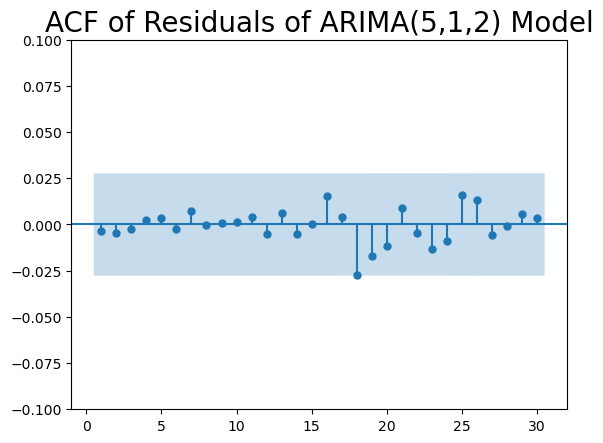

In [157]:
df['res_ar_5_i_1_ma_2'] = results_ar_5_i_1_ma_2.resid

# plot the acf of the residuals for ARIMA(5,1,2)
sgt.plot_acf(df.res_ar_5_i_1_ma_2, lags=30, zero=False)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('ACF of Residuals of ARIMA(5,1,2) Model', size=20)
plt.show()

* As we can see from the ACF plot the residuals are very little for the first 5 lags, because out model is able to explain the first few lags very well.
* Residuals being close to zero means there is very less correlation which is a characteristic of a white noise. This tells us our model performed very well.

### Models with higher levels of integration

In [158]:
df['delta_prices'] = df.market_value.diff(1)

In [159]:
model_delta_ar_1_i_0_ma_1 = ARIMA(df.delta_prices[1:], order=(1, 0, 1))
results_delta_ar_1_i_0_ma_1 = model_delta_ar_1_i_0_ma_1.fit()
print(results_delta_ar_1_i_0_ma_1.summary())

c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Niranjan\anaconda3\envs\credit_risk_modelling\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           delta_prices   No. Observations:                 5019
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27598.660
Date:                Mon, 04 Aug 2025   AIC                          55205.320
Time:                        20:12:30   BIC                          55231.404
Sample:                    01-11-1994   HQIC                         55214.460
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5653      0.753      0.751      0.453      -0.910       2.040
ar.L1          0.7477      0.059     12.684      0.000       0.632       0.863
ma.L1         -0.7938      0.053    -14.885      0.0

* **We used delta price to fit in ARMA(1,1) which is equivalent to ARIMA(1,1,1)**

In [160]:
sts.adfuller(df.delta_prices[1:])

(np.float64(-32.238943106931345),
 0.0,
 5,
 5013,
 {'1%': np.float64(-3.431655136974821),
  '5%': np.float64(-2.8621167297421373),
  '10%': np.float64(-2.567076993884522)},
 np.float64(54834.31732499655))

# ARIMAX Model

In [166]:
# import Index2018.csv as exog and do all same filtering and processing as above
df_exog = pd.read_csv("Index2018.csv")
df_exog.date = pd.to_datetime(df_exog.date, dayfirst=True)
df_exog.set_index('date', inplace=True)
df_exog = df_exog.asfreq('b')  # setting the Desired Frequency
df_exog = df_exog.fillna(method='ffill')  # fill missing values

df_exog

C:\Users\Niranjan\AppData\Local\Temp\ipykernel_23772\1632319882.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_exog = df_exog.fillna(method='ffill')  # fill missing values


,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [169]:
# attach the exog df to the main df based on the index but dont take out anyrows from the main df
df = df.join(df_exog[['dax', 'ftse', 'nikkei', 'spx']], how='left')

In [170]:
df.isna().sum()

market_value    0
returns         0
dax             0
ftse            0
nikkei          0
spx             0
dtype: int64

In [171]:
model_ar_1_i_1_ma_1_Xpsx = ARIMA(df.market_value,exog=df.spx ,order=(1, 1, 1))
results_ar_1_i_1_ma_1_Xpsx = model_ar_1_i_1_ma_1_Xpsx.fit()
print(results_ar_1_i_1_ma_1_Xpsx.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26688.373
Date:                Mon, 04 Aug 2025   AIC                          53384.746
Time:                        20:35:02   BIC                          53410.830
Sample:                    01-10-1994   HQIC                         53393.886
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6932      0.035     76.410      0.000       2.624       2.762
ar.L1          0.2568      0.029      8.802      0.000       0.200       0.314
ma.L1         -0.5458      0.025    -21.786      0.0

In [172]:
# exog as df.nikkei
model_ar_1_i_1_ma_1_Xnikkei = ARIMA(df.market_value, exog=df.nikkei, order=(1, 1, 1))
results_ar_1_i_1_ma_1_Xnikkei = model_ar_1_i_1_ma_1_Xnikkei.fit()
print(results_ar_1_i_1_ma_1_Xnikkei.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27413.049
Date:                Mon, 04 Aug 2025   AIC                          54834.097
Time:                        20:35:06   BIC                          54860.181
Sample:                    01-10-1994   HQIC                         54843.238
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
nikkei         0.0826      0.003     24.639      0.000       0.076       0.089
ar.L1          0.5924      0.049     12.045      0.000       0.496       0.689
ma.L1         -0.6913      0.043    -16.226      0.0

# SARIMAX Model

In [173]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [174]:
model_sarimax = SARIMAX(df.market_value, exog=df.spx, order=(1, 0, 1), seasonal_order=(2, 0, 1, 5))
results_sarimax = model_sarimax.fit()
print(results_sarimax.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      market_value   No. Observations:                 5020
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26706.981
Date:                           Mon, 04 Aug 2025   AIC                          53427.963
Time:                                   20:35:16   BIC                          53473.611
Sample:                               01-10-1994   HQIC                         53443.959
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7041      0.036     76.021      0.000       2.634       2.774
ar.L1          0.9997      0.001   1763.581